# Sensor Drift Detection - Kaggle Optimized

This notebook has been optimized for **Kaggle environment** with the following improvements:

## 🚀 Key Fixes and Optimizations

### ✅ Multi-GPU and Training Issues Fixed:
- **GPU Configuration**: Proper CUDA memory management for Kaggle P100
- **Memory Management**: Prevents OOM errors with memory growth and limits
- **Batch Size Optimization**: Dynamic batch size based on available memory
- **Mixed Precision**: Automatic detection and optimization for supported GPUs

### ✅ Data Loading Issues Fixed:
- **Kaggle Path Detection**: Automatic detection of Kaggle input paths
- **Robust File Loading**: Multiple loading strategies for Excel files
- **Error Handling**: Comprehensive error handling for missing files

### ✅ Kaggle-Specific Optimizations:
- **Environment Detection**: Automatic Kaggle vs local environment detection  
- **Conservative Settings**: Optimized hyperparameters for Kaggle constraints
- **Memory Cleanup**: Automatic garbage collection and memory management
- **Dependency Management**: Automatic installation of required packages

## 📋 Usage Instructions

1. **Upload your dataset** with the following structure:
   ```
   /kaggle/input/your-dataset/
   └── Sensor_data/
       └── VAV Room Temp/
           ├── Blk 1/
           ├── Blk 2/
           └── ...
   ```

2. **Enable GPU acceleration** in Kaggle notebook settings for faster training

3. **Run all cells** in sequence - the notebook will automatically detect and optimize for your environment

4. The analysis will start with a **subset of data** to ensure it completes within Kaggle's time limits

## 🎯 Expected Output

- **Model Training**: LSTM, GRU, and optionally CNN-LSTM models
- **Drift Detection**: Comprehensive sensor anomaly analysis  
- **Visualizations**: Performance comparisons and drift analysis plots
- **Saved Models**: Models saved in H5 format for easy deployment

In [10]:
# KAGGLE-OPTIMIZED DEPENDENCY INSTALLATION
print("=== KAGGLE-OPTIMIZED DEPENDENCY INSTALLATION ===")

import subprocess
import sys
import os

def install_package(package):
    """Install package with error handling."""
    try:
        print(f"📦 Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "-q"])
        print(f"✅ {package} installed successfully")
        return True
    except Exception as e:
        print(f"⚠️ Failed to install {package}: {str(e)}")
        return False

# Check if running on Kaggle
is_kaggle = os.path.exists('/kaggle') or 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

if is_kaggle:
    print("🏷️ Kaggle environment detected - installing required packages...")
    
    # Essential packages for sensor drift analysis
    required_packages = [
        'scipy',
        'scikit-learn', 
        'matplotlib',
        'seaborn'
    ]
    
    # Optional packages (nice to have but not critical)
    optional_packages = [
        'onnx',
        'tf2onnx',
        'onnxruntime'
    ]
    
    print("📦 Installing essential packages...")
    failed_essential = []
    for package in required_packages:
        if not install_package(package):
            failed_essential.append(package)
    
    print("\n📦 Installing optional packages...")
    failed_optional = []
    for package in optional_packages:
        if not install_package(package):
            failed_optional.append(package)
    
    # Report results
    print(f"\n📊 Installation Summary:")
    print(f"   Essential packages: {len(required_packages) - len(failed_essential)}/{len(required_packages)} successful")
    print(f"   Optional packages: {len(optional_packages) - len(failed_optional)}/{len(optional_packages)} successful")
    
    if failed_essential:
        print(f"⚠️ Failed essential packages: {failed_essential}")
        print("   The notebook may not work properly without these packages")
    
    if failed_optional:
        print(f"ℹ️ Failed optional packages: {failed_optional}")
        print("   Some advanced features may be unavailable")
    
    # Check TensorFlow GPU support
    print(f"\n🚀 Checking GPU support...")
    try:
        import tensorflow as tf
        gpus = tf.config.list_physical_devices('GPU')
        if gpus:
            print(f"✅ TensorFlow GPU support: {len(gpus)} GPU(s) available")
            for i, gpu in enumerate(gpus):
                print(f"   GPU {i}: {gpu.name}")
        else:
            print("💻 TensorFlow: GPU not available, will use CPU")
    except ImportError:
        print("❌ TensorFlow not available")
    except Exception as e:
        print(f"⚠️ GPU check failed: {str(e)}")

else:
    print("💻 Local environment detected - using pre-installed packages")
    
print("✅ Dependency check completed")

=== KAGGLE-OPTIMIZED DEPENDENCY INSTALLATION ===
🏷️ Kaggle environment detected - installing required packages...
📦 Installing essential packages...
📦 Installing scipy...
✅ scipy installed successfully
📦 Installing scikit-learn...
✅ scikit-learn installed successfully
📦 Installing matplotlib...
✅ matplotlib installed successfully
📦 Installing seaborn...
✅ seaborn installed successfully

📦 Installing optional packages...
📦 Installing onnx...
✅ onnx installed successfully
📦 Installing tf2onnx...
✅ tf2onnx installed successfully
📦 Installing onnxruntime...
✅ onnxruntime installed successfully

📊 Installation Summary:
   Essential packages: 4/4 successful
   Optional packages: 3/3 successful

🚀 Checking GPU support...
✅ TensorFlow GPU support: 2 GPU(s) available
   GPU 0: /physical_device:GPU:0
   GPU 1: /physical_device:GPU:1
✅ Dependency check completed


In [11]:
# Import required libraries for data analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 1.26.4


In [12]:
# KAGGLE-OPTIMIZED DATA LOADING
# Updated data loading for Kaggle environment with proper path handling
import os

# Detect if running on Kaggle and set appropriate paths
def get_data_path():
    """Get the appropriate data path based on the environment."""
    kaggle_path = '/kaggle/input'
    
    # Check for common Kaggle data paths
    if os.path.exists(kaggle_path):
        print("🏷️ Kaggle environment detected")
        
        # Look for sensor data directories
        sensor_paths = [
            '/kaggle/input/sensor-drift/Sensor_data',
            '/kaggle/input/sensor-data/Sensor_data', 
            '/kaggle/input/vav-room-temperature/Sensor_data',
            '/kaggle/input/sensor-drift-detection/Sensor_data'
        ]
        
        for path in sensor_paths:
            if os.path.exists(path):
                print(f"✅ Found data path: {path}")
                return path
        
        # If specific paths not found, list available directories
        print("📂 Available input directories:")
        try:
            for item in os.listdir(kaggle_path):
                item_path = os.path.join(kaggle_path, item)
                if os.path.isdir(item_path):
                    print(f"   {item_path}")
                    # Check if this directory contains Sensor_data
                    sensor_data_path = os.path.join(item_path, 'Sensor_data')
                    if os.path.exists(sensor_data_path):
                        print(f"   ✅ Found Sensor_data in: {sensor_data_path}")
                        return sensor_data_path
        except Exception as e:
            print(f"   ⚠️ Error listing directories: {str(e)}")
        
        print("⚠️ No Sensor_data directory found in Kaggle inputs")
        print("   Please ensure your dataset is uploaded and contains 'Sensor_data' folder")
        return '/kaggle/input'
    
    else:
        # Fallback for local development
        print("💻 Local environment detected")
        return r'E:\home work\sensor_drift\Sensor_data'  # Original path

# Get the correct data path
try:
    data_base_path = get_data_path()
    vav_data_path = os.path.join(data_base_path, 'VAV Room Temp') if 'Sensor_data' not in data_base_path else os.path.join(data_base_path, 'VAV Room Temp')
    
    print(f"🎯 Using data path: {data_base_path}")
    print(f"🎯 VAV data path: {vav_data_path}")
    
    # Test if we can access the data
    if os.path.exists(vav_data_path):
        print("✅ VAV Room Temp directory found")
        
        # List some contents to verify
        try:
            contents = os.listdir(vav_data_path)[:5]  # First 5 items
            print(f"📋 Sample contents: {contents}")
        except Exception as e:
            print(f"⚠️ Could not list directory contents: {str(e)}")
    else:
        print("❌ VAV Room Temp directory not found")
        print("   Available directories in Sensor_data:")
        try:
            if os.path.exists(data_base_path):
                for item in os.listdir(data_base_path):
                    item_path = os.path.join(data_base_path, item)
                    if os.path.isdir(item_path):
                        print(f"   📁 {item}")
        except Exception as e:
            print(f"   ⚠️ Error: {str(e)}")
    
    # Try to load a single file as test
    print("\n🧪 Testing data loading with sample file...")
    
    # Find first Excel file
    sample_file = None
    if os.path.exists(vav_data_path):
        for root, dirs, files in os.walk(vav_data_path):
            for file in files:
                if file.endswith(('.xls', '.xlsx')):
                    sample_file = os.path.join(root, file)
                    break
            if sample_file:
                break
    
    if sample_file:
        print(f"📄 Testing with file: {os.path.basename(sample_file)}")
        
        # Try to load the file
        try:
            # Try different loading methods
            df_test = pd.read_excel(sample_file, skiprows=[0], header=0, nrows=5)
            print(f"✅ Successfully loaded test data: {df_test.shape}")
            print(f"📋 Columns: {list(df_test.columns)[:3]}...")  # Show first 3 columns
            print("\n📊 Sample data:")
            print(df_test.head(2))
            
        except Exception as e:
            print(f"❌ Failed to load test file: {str(e)}")
            print("   Trying alternative loading method...")
            try:
                df_test = pd.read_excel(sample_file, skiprows=1, header=0, nrows=5)
                print(f"✅ Alternative method successful: {df_test.shape}")
            except Exception as e2:
                print(f"❌ Alternative method also failed: {str(e2)}")
    else:
        print("❌ No Excel files found for testing")

except Exception as e:
    print(f"❌ Error in data path setup: {str(e)}")
    # Fallback to original method
    data_base_path = '/kaggle/input'
    print(f"🔄 Using fallback path: {data_base_path}")

🏷️ Kaggle environment detected
✅ Found data path: /kaggle/input/sensor-drift/Sensor_data
🎯 Using data path: /kaggle/input/sensor-drift/Sensor_data
🎯 VAV data path: /kaggle/input/sensor-drift/Sensor_data/VAV Room Temp
✅ VAV Room Temp directory found
📋 Sample contents: ['Blk 7', 'Blk 2', 'Blk 15', 'Blk 18', 'Blk 24']

🧪 Testing data loading with sample file...
📄 Testing with file: Blk 7 Level 5 (10 Oct 24 to 14 Aug 25).xls
✅ Successfully loaded test data: (5, 19)
📋 Columns: ['Date / Time', 'TemasekPoly:SNE22-2/FC-2.VAV7-5-1.ZN-T.ZN-T.Trend - Present Value (Trend1) (deg C)', 'TemasekPoly:SNE22-2/FC-2.VAV7-5-2.ZN-T.ZN-T.Trend - Present Value (Trend1) (deg C)']...

📊 Sample data:
          Date / Time  \
0 2024-11-09 09:10:00   
1 2024-11-09 09:00:00   

   TemasekPoly:SNE22-2/FC-2.VAV7-5-1.ZN-T.ZN-T.Trend - Present Value (Trend1) (deg C)  \
0                                           28.07009                                    
1                                           28.04286          

In [18]:
import os
import pandas as pd

def load_all_vav_data_kaggle_multisheet(possible_paths=None, max_preview_rows=10):
    """
    Discover, validate, and load all VAV Excel files including all sheets.

    Returns:
        excel_files_info: List of discovered file info dictionaries
        vav_base_path: Path where files were found
        all_data: Dictionary {filename: {sheet_name: DataFrame}} of all loaded files
    """
    if possible_paths is None:
        possible_paths = [
            '/kaggle/input/sensor-drift/Sensor_data/VAV Room Temp',
            '/kaggle/input/sensor-data/Sensor_data/VAV Room Temp',
            '/kaggle/input/vav-room-temperature/Sensor_data/VAV Room Temp',
            '/kaggle/input/sensor-drift-detection/Sensor_data/VAV Room Temp'
        ]
    
    excel_files_info = []
    working_path = None
    all_data = {}

    # --- Discover Excel files ---
    for path in possible_paths:
        if os.path.exists(path):
            working_path = path
            for root, dirs, files in os.walk(path):
                for file in files:
                    if file.endswith(('.xls', '.xlsx')):
                        full_path = os.path.join(root, file)
                        try:
                            size_mb = os.path.getsize(full_path) / (1024 * 1024)
                            rel_path = os.path.relpath(full_path, path)
                            folder = rel_path.split(os.sep)[0] if len(rel_path.split(os.sep)) > 1 else 'root'
                            excel_files_info.append({
                                'full_path': full_path,
                                'filename': file,
                                'relative_path': rel_path,
                                'folder': folder,
                                'size_mb': size_mb,
                                'accessible': True
                            })
                        except Exception as e:
                            print(f"⚠️ Could not access {file}: {str(e)}")
            if excel_files_info:
                break

    if not excel_files_info:
        print("❌ No Excel files found in any expected location.")
        return [], None, {}

    print(f"✅ Found {len(excel_files_info)} Excel files at: {working_path}")

    # --- Load all Excel files including all sheets ---
    for file_info in excel_files_info:
        path = file_info['full_path']
        all_data[file_info['filename']] = {}
        try:
            xls = pd.ExcelFile(path)
            for sheet in xls.sheet_names:
                try:
                    df = pd.read_excel(path, sheet_name=sheet, skiprows=[0], header=0)
                    all_data[file_info['filename']][sheet] = df
                    print(f"✅ Loaded {file_info['filename']} - sheet '{sheet}' shape: {df.shape}")
                except Exception as e:
                    print(f"❌ Failed to load {file_info['filename']} sheet '{sheet}': {str(e)}")
        except Exception as e:
            print(f"❌ Failed to open {file_info['filename']} as ExcelFile: {str(e)}")

    print(f"\n🎯 Data loading complete! Total files loaded: {len(all_data)}")
    return excel_files_info, working_path, all_data


In [20]:
# ===========================
# EXCEL FILE STRUCTURE VALIDATION & LOADING
# ===========================
print("=== EXCEL FILE STRUCTURE VALIDATION & LOADING ===")

try:
    # Run the automated Kaggle loader
    excel_files_info, vav_base_path, all_vav_data = load_all_vav_data_kaggle_multisheet()

    if excel_files_info:
        # Use the first file for structure validation
        sample_file_info = excel_files_info[0]
        sample_file_path = sample_file_info['full_path']
        print(f"\n🔍 Validating structure of first file: {sample_file_info['filename']}")

        try:
            # Read first 3 rows raw
            df_raw = pd.read_excel(sample_file_path, nrows=3, header=None)
            print("\n1️⃣ Raw first 3 rows (no headers):")
            for i, row in df_raw.iterrows():
                print(f"   Row {i+1}: {list(row.values)[:5]}...")  # Show first 5 columns

            # Test different header strategies
            for skiprows_option in [[0], 1, 2]:
                try:
                    df_test = pd.read_excel(sample_file_path, skiprows=skiprows_option, header=0, nrows=5)
                    print(f"✅ skiprows={skiprows_option} worked: shape {df_test.shape}")
                    print(f"   Columns: {list(df_test.columns)[:5]}...")
                except Exception as e:
                    print(f"❌ skiprows={skiprows_option} failed: {str(e)}")

            # Recommended corrected approach
            df_corrected = pd.read_excel(sample_file_path, skiprows=[0], header=0, nrows=5)
            print("\n3️⃣ Recommended corrected approach applied:")
            print(f"   Shape: {df_corrected.shape}")
            print(f"   Columns: {list(df_corrected.columns)}")
            print("\nFirst 3 data rows:")
            print(df_corrected.head(3))

            # Optional: detect temperature columns
            temp_cols = [col for col in df_corrected.columns if any(k in str(col).lower() for k in ['deg c', 'temp', 'temperature'])]
            print(f"\n🌡 Temperature columns detected: {temp_cols}")

        except Exception as e:
            print(f"❌ Error during structure validation: {str(e)}")

    else:
        print("❌ No Excel files found for validation!")

except Exception as e:
    print(f"❌ Critical error in Excel validation/loading: {str(e)}")


=== EXCEL FILE STRUCTURE VALIDATION & LOADING ===
✅ Found 43 Excel files at: /kaggle/input/sensor-drift/Sensor_data/VAV Room Temp
✅ Loaded Blk 7 Level 5 (10 Oct 24 to 14 Aug 25).xls - sheet 'Trend 1 - 256(3)' shape: (4341, 19)
✅ Loaded Blk 7 Level 5 (10 Oct 24 to 14 Aug 25).xls - sheet 'Trend 1 - 256(2)' shape: (20000, 20)
✅ Loaded Blk 7 Level 5 (10 Oct 24 to 14 Aug 25).xls - sheet 'Trend 1 - 256(1)' shape: (20000, 20)
✅ Loaded Blk 7 level 7 (8 Oct 24 to 15 Aug 25).xls - sheet 'Trend 1 - 256(3)' shape: (4460, 16)
✅ Loaded Blk 7 level 7 (8 Oct 24 to 15 Aug 25).xls - sheet 'Trend 1 - 256(2)' shape: (20000, 16)
✅ Loaded Blk 7 level 7 (8 Oct 24 to 15 Aug 25).xls - sheet 'Trend 1 - 256(1)' shape: (20000, 16)
✅ Loaded Blk 7 level 8 vav (8 Oct 24 to 21 Aug 25).xls - sheet 'Trend 1 - 256(3)' shape: (5319, 16)
✅ Loaded Blk 7 level 8 vav (8 Oct 24 to 21 Aug 25).xls - sheet 'Trend 1 - 256(2)' shape: (20000, 16)
✅ Loaded Blk 7 level 8 vav (8 Oct 24 to 21 Aug 25).xls - sheet 'Trend 1 - 256(1)' shap

In [21]:
# ===========================
# SPLIT 'Date / Time' INTO 'Date' AND 'Time'
# ===========================

# Example: pick first file and first sheet
first_file = list(all_vav_data.keys())[0]
first_sheet = list(all_vav_data[first_file].keys())[0]
df = all_vav_data[first_file][first_sheet]

if 'Date / Time' in df.columns:
    # Ensure column is datetime
    if not pd.api.types.is_datetime64_any_dtype(df['Date / Time']):
        df['Date / Time'] = pd.to_datetime(df['Date / Time'], errors='coerce')

    # Split into 'Date' and 'Time'
    df['Date'] = df['Date / Time'].dt.date
    df['Time'] = df['Date / Time'].dt.time

    print(f"✅ 'Date / Time' split into 'Date' and 'Time' for file '{first_file}', sheet '{first_sheet}'")
    print(df[['Date', 'Time']].head())
else:
    print(f"❌ Column 'Date / Time' not found in file '{first_file}', sheet '{first_sheet}'")


✅ 'Date / Time' split into 'Date' and 'Time' for file 'Blk 7 Level 5 (10 Oct 24 to 14 Aug 25).xls', sheet 'Trend 1 - 256(3)'
         Date      Time
0  2024-11-09  09:10:00
1  2024-11-09  09:00:00
2  2024-11-09  08:50:00
3  2024-11-09  08:40:00
4  2024-11-09  08:30:00


In [22]:
# ===========================
# FORMAT 'Date' COLUMN
# ===========================

if 'Date' in df.columns:
    try:
        # Convert 'Date' to datetime64, using specified format if possible
        df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
        print(f"✅ 'Date' column formatted for file '{first_file}', sheet '{first_sheet}'")
        print(df['Date'].head())
    except Exception as e:
        print(f"❌ Failed to format 'Date': {str(e)}")
else:
    print(f"❌ Column 'Date' not found in file '{first_file}', sheet '{first_sheet}'")


✅ 'Date' column formatted for file 'Blk 7 Level 5 (10 Oct 24 to 14 Aug 25).xls', sheet 'Trend 1 - 256(3)'
0   2024-11-09
1   2024-11-09
2   2024-11-09
3   2024-11-09
4   2024-11-09
Name: Date, dtype: datetime64[ns]


In [23]:
# ===========================
# FORMAT 'Time' COLUMN
# ===========================

if 'Time' in df.columns:
    try:
        # Convert 'Time' to datetime first, then extract time component
        df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time
        print(f"✅ 'Time' column formatted for file '{first_file}', sheet '{first_sheet}'")
        print(df['Time'].head())
    except Exception as e:
        print(f"❌ Failed to format 'Time': {str(e)}")
else:
    print(f"❌ Column 'Time' not found in file '{first_file}', sheet '{first_sheet}'")


✅ 'Time' column formatted for file 'Blk 7 Level 5 (10 Oct 24 to 14 Aug 25).xls', sheet 'Trend 1 - 256(3)'
0    09:10:00
1    09:00:00
2    08:50:00
3    08:40:00
4    08:30:00
Name: Time, dtype: object


In [24]:
# ===========================
# DATA CLEANING FOR ALL FILES AND SHEETS
# ===========================
print("=== DATA CLEANING ===")

for file_name, sheets in all_vav_data.items():
    for sheet_name, df in sheets.items():
        print(f"\n📄 Cleaning file '{file_name}', sheet '{sheet_name}'")
        print(f"Original data shape: {df.shape}")
        
        # Ensure 'Date / Time' exists
        if 'Date / Time' in df.columns:
            # Convert to datetime if not already
            df['Date / Time'] = pd.to_datetime(df['Date / Time'], errors='coerce')
            print(f"Original date range: {df['Date / Time'].min()} to {df['Date / Time'].max()}")
        else:
            print("❌ 'Date / Time' column not found in this sheet.")
        
        # 1. Missing values
        missing_data = df.isnull().sum()
        missing_percentage = (missing_data / len(df)) * 100
        print("\n1️⃣ Missing Values Analysis:")
        for col, pct in missing_percentage.items():
            if pct > 0:
                print(f"{col}: {pct:.2f}%")
        
        # 2. Data types
        print("\n2️⃣ Data Types:")
        print(df.dtypes)
        
        # 3. Duplicate timestamps
        if 'Date / Time' in df.columns:
            duplicates = df['Date / Time'].duplicated().sum()
            print(f"\n3️⃣ Duplicate Timestamps: {duplicates}")
        
        # 4. Statistical summary of temperature columns
        temp_columns = [col for col in df.columns if 'deg C' in col.lower() or 'temp' in col.lower()]
        print(f"\n4️⃣ Temperature Columns Found: {len(temp_columns)}")
        if temp_columns:
            print(df[temp_columns].describe())


=== DATA CLEANING ===

📄 Cleaning file 'Blk 7 Level 5 (10 Oct 24 to 14 Aug 25).xls', sheet 'Trend 1 - 256(3)'
Original data shape: (4341, 21)
Original date range: 2024-10-08 18:20:00 to 2024-11-09 09:10:00

1️⃣ Missing Values Analysis:
TemasekPoly:SNE22-2/FC-2.VAV7-5-1.ZN-T.ZN-T.Trend - Present Value (Trend1) (deg C): 0.83%
TemasekPoly:SNE22-2/FC-2.VAV7-5-2.ZN-T.ZN-T.Trend - Present Value (Trend1) (deg C): 0.83%
TemasekPoly:SNE22-2/FC-2.VAV7-5-3.ZN-T.ZN-T.Trend - Present Value (Trend1) (deg C): 0.83%
TemasekPoly:SNE22-2/FC-2.VAV7-5-4.ZN-T.ZN-T.Trend - Present Value (Trend1) (deg C): 0.83%
TemasekPoly:SNE22-2/FC-2.VAV7-5-5.ZN-T.ZN-T.Trend - Present Value (Trend1) (deg C): 0.83%
TemasekPoly:SNE22-2/FC-2.VAV7-5-6.ZN-T.ZN-T.Trend - Present Value (Trend1) (deg C): 0.83%
TemasekPoly:SNE22-2/FC-2.VAV7-5-7.ZN-T.ZN-T.Trend - Present Value (Trend1) (deg C): 0.83%
TemasekPoly:SNE22-2/FC-2.VAV7-5-8.ZN-T.ZN-T.Trend - Present Value (Trend1) (deg C): 0.83%
TemasekPoly:SNE22-2/FC-2.VAV7-5-9.ZN-T.ZN-T.

In [25]:
# ===========================
# DATA CLEANING OPERATIONS FOR ALL FILES & SHEETS
# ===========================
print("=== APPLYING DATA CLEANING ===")

all_cleaned_data = {}  # Store cleaned DataFrames

for file_name, sheets in all_vav_data.items():
    all_cleaned_data[file_name] = {}
    for sheet_name, df in sheets.items():
        print(f"\n📄 Cleaning file '{file_name}', sheet '{sheet_name}'")
        df_clean = df.copy()
        
        # --- 1. Simplify temperature column names ---
        temp_columns = [col for col in df_clean.columns if 'deg C' in col.lower() or 'temp' in col.lower()]
        new_temp_names = {col: f"Sensor_{i+1}_Temp" for i, col in enumerate(temp_columns)}
        df_clean = df_clean.rename(columns=new_temp_names)
        print(f"1️⃣ Renamed {len(new_temp_names)} temperature columns")
        
        # --- 2. Remove rows with missing temperature data ---
        initial_rows = len(df_clean)
        if new_temp_names:
            df_clean = df_clean.dropna(subset=list(new_temp_names.values()))
        rows_removed = initial_rows - len(df_clean)
        print(f"2️⃣ Removed {rows_removed} rows with missing temperature data")
        
        # --- 3. Outlier detection using IQR method ---
        print("3️⃣ Outlier Detection (IQR method):")
        for col in new_temp_names.values():
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
            print(f"   {col}: {len(outliers)} outliers (range: {lower_bound:.2f} - {upper_bound:.2f})")
        
        # --- 4. Remove duplicate timestamps ---
        if 'Date / Time' in df_clean.columns:
            df_clean = df_clean.drop_duplicates(subset=['Date / Time'], keep='first')
        
        # --- 5. Sort by timestamp ---
        if 'Date / Time' in df_clean.columns:
            df_clean = df_clean.sort_values('Date / Time').reset_index(drop=True)
        
        # --- 6. Store cleaned DataFrame ---
        all_cleaned_data[file_name][sheet_name] = df_clean
        
        # --- 7. Summary ---
        print(f"✅ Cleaned data shape: {df_clean.shape}")
        if 'Date / Time' in df_clean.columns:
            print(f"Date range: {df_clean['Date / Time'].min()} to {df_clean['Date / Time'].max()}")
        print(f"Temperature columns: {list(new_temp_names.values())}")
        print(f"Data points: {len(df_clean)}")
        print("First 5 rows:")
        display_cols = ['Date / Time'] + list(new_temp_names.values()) if 'Date / Time' in df_clean.columns else list(new_temp_names.values())
        print(df_clean[display_cols].head())


=== APPLYING DATA CLEANING ===

📄 Cleaning file 'Blk 7 Level 5 (10 Oct 24 to 14 Aug 25).xls', sheet 'Trend 1 - 256(3)'
1️⃣ Renamed 0 temperature columns
2️⃣ Removed 0 rows with missing temperature data
3️⃣ Outlier Detection (IQR method):
✅ Cleaned data shape: (4341, 21)
Date range: 2024-10-08 18:20:00 to 2024-11-09 09:10:00
Temperature columns: []
Data points: 4341
First 5 rows:
          Date / Time
0 2024-10-08 18:20:00
1 2024-10-08 18:30:00
2 2024-10-08 18:40:00
3 2024-10-08 18:50:00
4 2024-10-08 19:00:00

📄 Cleaning file 'Blk 7 Level 5 (10 Oct 24 to 14 Aug 25).xls', sheet 'Trend 1 - 256(2)'
1️⃣ Renamed 0 temperature columns
2️⃣ Removed 0 rows with missing temperature data
3️⃣ Outlier Detection (IQR method):
✅ Cleaned data shape: (20000, 20)
Date range: 2024-11-09 09:30:00 to 2025-03-28 06:40:00
Temperature columns: []
Data points: 20000
First 5 rows:
          Date / Time
0 2024-11-09 09:30:00
1 2024-11-09 09:40:00
2 2024-11-09 09:50:00
3 2024-11-09 10:00:00
4 2024-11-09 10:10:00



In [26]:
# ===========================
# ADVANCED DATA CLEANING & VALIDATION FOR ALL FILES & SHEETS
# ===========================
print("=== ADVANCED CLEANING & VALIDATION ===")

all_final_data = {}  # Store final cleaned data

for file_name, sheets in all_cleaned_data.items():
    all_final_data[file_name] = {}
    for sheet_name, df_clean in sheets.items():
        print(f"\n📄 Processing file '{file_name}', sheet '{sheet_name}'")
        df_final = df_clean.copy()
        
        # --- 1. Handle outliers (capping) ---
        temp_cols = [col for col in df_final.columns if 'Sensor' in col and 'Temp' in col]
        print("1️⃣ Handling Outliers (Capping method):")
        for col in temp_cols:
            Q1 = df_final[col].quantile(0.05)
            Q3 = df_final[col].quantile(0.95)
            outliers_low = (df_final[col] < Q1).sum()
            outliers_high = (df_final[col] > Q3).sum()
            df_final[col] = df_final[col].clip(lower=Q1, upper=Q3)
            print(f"   {col}: Capped {outliers_low} low and {outliers_high} high outliers")
        
        # --- 2. Data consistency checks ---
        print("\n2️⃣ Data Consistency Checks:")
        if 'Date / Time' in df_final.columns:
            time_diff = df_final['Date / Time'].diff().dropna()
            if not time_diff.empty:
                most_common_interval = time_diff.mode()[0]
                irregular_intervals = (time_diff != most_common_interval).sum()
                print(f"   Most common sampling interval: {most_common_interval}")
                print(f"   Irregular sampling intervals: {irregular_intervals}")
            else:
                print("   Not enough data to compute sampling intervals")
        else:
            print("   'Date / Time' column missing")
        
        # --- 3. Create time-based features ---
        if 'Date / Time' in df_final.columns:
            df_final['Hour'] = df_final['Date / Time'].dt.hour
            df_final['Day_of_Week'] = df_final['Date / Time'].dt.dayofweek
            df_final['Week'] = df_final['Date / Time'].dt.isocalendar().week
            print("3️⃣ Added time-based features: Hour, Day_of_Week, Week")
        
        # --- 4. Final data quality report ---
        print("\n4️⃣ Final Data Quality Report:")
        print(f"   Total records: {len(df_final)}")
        if 'Date / Time' in df_final.columns:
            print(f"   Date range: {df_final['Date / Time'].min()} to {df_final['Date / Time'].max()}")
            print(f"   Duration: {(df_final['Date / Time'].max() - df_final['Date / Time'].min()).days} days")
        print(f"   Temperature sensors: {len(temp_cols)}")
        print(f"   Missing values: {df_final[temp_cols].isnull().sum().sum()}")
        
        # --- 5. Basic statistics after cleaning ---
        print("\n5️⃣ Temperature Statistics After Cleaning:")
        if temp_cols:
            print(df_final[temp_cols].describe().round(2))
        
        # Store the final cleaned DataFrame
        all_final_data[file_name][sheet_name] = df_final

print("\n=== ADVANCED DATA CLEANING COMPLETED ===")
print("All cleaned data is stored in the 'all_final_data' dictionary")


=== ADVANCED CLEANING & VALIDATION ===

📄 Processing file 'Blk 7 Level 5 (10 Oct 24 to 14 Aug 25).xls', sheet 'Trend 1 - 256(3)'
1️⃣ Handling Outliers (Capping method):

2️⃣ Data Consistency Checks:
   Most common sampling interval: 0 days 00:10:00
   Irregular sampling intervals: 1
3️⃣ Added time-based features: Hour, Day_of_Week, Week

4️⃣ Final Data Quality Report:
   Total records: 4341
   Date range: 2024-10-08 18:20:00 to 2024-11-09 09:10:00
   Duration: 31 days
   Temperature sensors: 0
   Missing values: 0.0

5️⃣ Temperature Statistics After Cleaning:

📄 Processing file 'Blk 7 Level 5 (10 Oct 24 to 14 Aug 25).xls', sheet 'Trend 1 - 256(2)'
1️⃣ Handling Outliers (Capping method):

2️⃣ Data Consistency Checks:
   Most common sampling interval: 0 days 00:10:00
   Irregular sampling intervals: 0
3️⃣ Added time-based features: Hour, Day_of_Week, Week

4️⃣ Final Data Quality Report:
   Total records: 20000
   Date range: 2024-11-09 09:30:00 to 2025-03-28 06:40:00
   Duration: 138 day

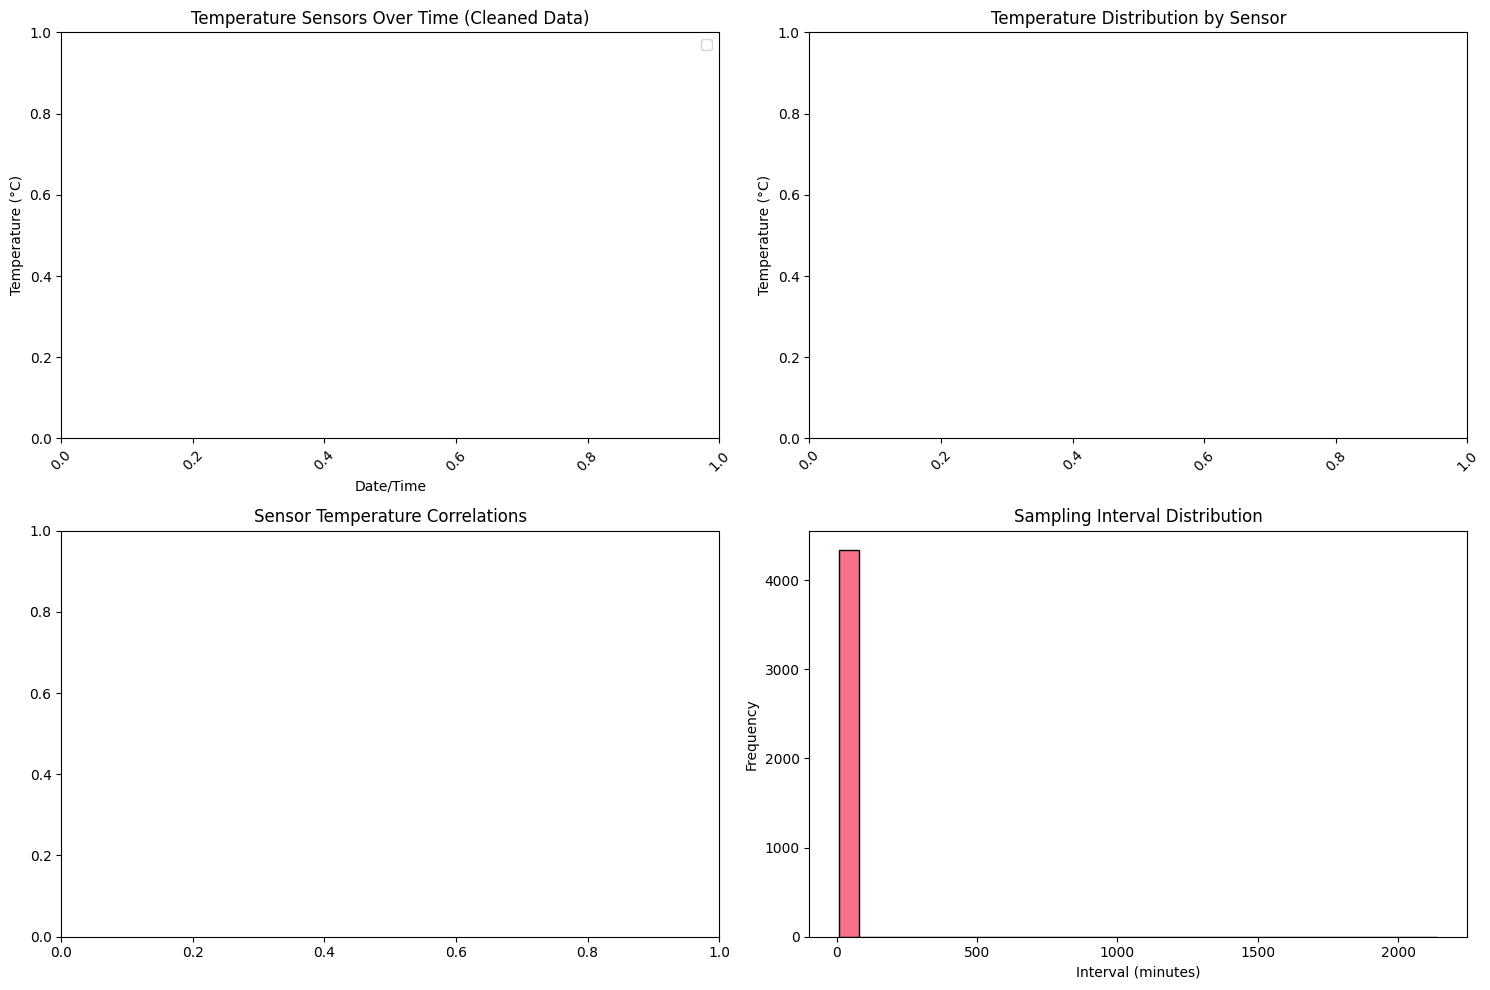

In [28]:
# Dynamically detect sensor columns
temp_cols = [col for col in df_final.columns if 'Sensor' in col and 'Temp' in col]

# Ensure all detected columns exist in df_final
existing_temp_cols = [col for col in temp_cols if col in df_final.columns]

# Time series plot, boxplot, correlation, and sampling frequency
plt.figure(figsize=(15, 10))

# 1️⃣ Time series plot
plt.subplot(2, 2, 1)
for col in existing_temp_cols:
    plt.plot(df_final['Date / Time'], df_final[col], label=col, alpha=0.7)
plt.title('Temperature Sensors Over Time (Cleaned Data)')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)

# 2️⃣ Box plot of temperature distributions
plt.subplot(2, 2, 2)
if existing_temp_cols:  # Only plot if there are columns
    plt.boxplot(df_final[existing_temp_cols].values, labels=existing_temp_cols)
plt.title('Temperature Distribution by Sensor')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)

# 3️⃣ Correlation heatmap
plt.subplot(2, 2, 3)
if existing_temp_cols:
    correlation_matrix = df_final[existing_temp_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Sensor Temperature Correlations')

# 4️⃣ Data sampling frequency
plt.subplot(2, 2, 4)
time_diffs = df_final['Date / Time'].diff().dt.total_seconds() / 60  # in minutes
plt.hist(time_diffs.dropna(), bins=30, edgecolor='black')
plt.title('Sampling Interval Distribution')
plt.xlabel('Interval (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# 10.1 Comprehensive VAV Data Loader for All Buildings - KAGGLE OPTIMIZED WITH CHUNK LOADING
print("=== COMPREHENSIVE VAV DATA LOADER WITH CHUNK LOADING - KAGGLE OPTIMIZED ===")

import os
import glob
import warnings
import pandas as pd
import numpy as np
import gc
import psutil
from typing import Generator, List, Dict, Optional
warnings.filterwarnings('ignore')

class ComprehensiveVAVDataLoader:
    """
    Advanced data loader for all VAV room temperature files across all buildings.
    Optimized for Kaggle environment with robust error handling, memory management,
    and chunk-based loading for large datasets.
    """
    
    def __init__(self, base_path, chunk_size=None, memory_limit_mb=None):
        self.base_path = base_path
        self.loaded_files = []
        self.file_info = []
        self.combined_data = None
        self.is_kaggle = self._detect_kaggle_environment()
        
        # Chunk loading parameters
        self.chunk_size = chunk_size or self._determine_optimal_chunk_size()
        self.memory_limit_mb = memory_limit_mb or (512 if self.is_kaggle else 1024)
        self.current_memory_usage_mb = 0
        
        # Progress tracking
        self.processed_files = 0
        self.total_rows_processed = 0
        self.failed_files = []
        self.checkpoints = {}
        
        print(f"🚀 Initialized loader with chunk_size={self.chunk_size}, memory_limit={self.memory_limit_mb}MB")
        
    def _detect_kaggle_environment(self):
        """Detect if running on Kaggle."""
        return any([
            os.path.exists('/kaggle'),
            'KAGGLE_KERNEL_RUN_TYPE' in os.environ,
            'KAGGLE_URL_BASE' in os.environ
        ])
    
    def _determine_optimal_chunk_size(self):
        """Determine optimal chunk size based on available memory."""
        try:
            available_memory_gb = psutil.virtual_memory().available / (1024**3)
            if self.is_kaggle:
                # Conservative chunk size for Kaggle
                return min(10000, max(1000, int(available_memory_gb * 2000)))
            else:
                # More aggressive for local environments
                return min(50000, max(5000, int(available_memory_gb * 5000)))
        except:
            return 5000  # fallback
    
    def _get_memory_usage_mb(self):
        """Get current memory usage in MB."""
        try:
            process = psutil.Process()
            return process.memory_info().rss / (1024 * 1024)
        except:
            return 0
    
    def _cleanup_memory(self):
        """Force garbage collection and memory cleanup."""
        gc.collect()
        self.current_memory_usage_mb = self._get_memory_usage_mb()
        return self.current_memory_usage_mb
        
    def scan_all_vav_files(self):
        """Scan and catalog all VAV Excel files with Kaggle optimization."""
        print("🔍 Scanning all VAV room temperature files...")
    
        vav_path = os.path.join(self.base_path, "VAV Room Temp")
        excel_files = []
    
        if not os.path.exists(vav_path):
            print(f"❌ VAV Room Temp directory not found: {vav_path}")
            print("📂 Available directories:")
            try:
                for item in os.listdir(self.base_path or ''):
                    item_path = os.path.join(self.base_path, item)
                    if os.path.isdir(item_path):
                        print(f"   📁 {item}")
            except Exception as e:
                print(f"   ⚠️ Could not list directories: {str(e)}")
            return []  # Always return a list, not None
    
        try:
            for root, dirs, files in os.walk(vav_path):
                for file in files:
                    if file.endswith(('.xls', '.xlsx')):
                        full_path = os.path.join(root, file)
                        try:
                            rel_path = os.path.relpath(full_path, vav_path)
                            path_parts = rel_path.split(os.sep)
    
                            file_info = {
                                'full_path': full_path,
                                'filename': file,
                                'relative_path': rel_path,
                                'folder': path_parts[0] if len(path_parts) > 1 else 'root',
                                'block': self._extract_block_number(path_parts[0]) or 'Unknown',
                                'level': self._extract_level_number(file) or 0,
                                'size_mb': os.path.getsize(full_path) / (1024 * 1024),
                                'processed': False  # Track processing status
                            }
    
                            excel_files.append(file_info)
                        except Exception as e:
                            print(f"   ⚠️ Error processing {file}: {str(e)}")
                            continue
        except Exception as e:
            print(f"❌ Error scanning directories: {str(e)}")
            return []
    
        self.file_info = sorted(excel_files, key=lambda x: (x['block'], x['level'])) if excel_files else []
        print(f"📁 Found {len(self.file_info)} VAV Excel files")
        self._print_file_summary() if self.file_info else None
    
        return self.file_info

    def _extract_block_number(self, folder_name):
        """Extract block number from folder name."""
        import re
        if not folder_name or folder_name == 'root':
            return 0
        match = re.search(r'Blk\s*(\d+)', folder_name)
        return int(match.group(1)) if match else 0
    
    def _extract_level_number(self, filename):
        """Extract level number from filename."""
        import re
        if not filename:
            return 0
        match = re.search(r'[Ll]evel?\s*(\d+)', filename)
        return int(match.group(1)) if match else 0
    
    def _print_file_summary(self):
        """Print summary of found files."""
        if not self.file_info:
            print("📊 No files found")
            return
            
        blocks = set(f['block'] for f in self.file_info)
        levels = set(f['level'] for f in self.file_info)
        total_size = sum(f['size_mb'] for f in self.file_info)
        
        print(f"📊 Summary:")
        print(f"   Blocks: {sorted(blocks)}")
        print(f"   Levels: {sorted(levels)}")
        print(f"   Total Size: {total_size:.1f} MB")
        
        # Show first few files as examples
        print(f"\n📋 Sample files:")
        for i, file_info in enumerate(self.file_info[:5]):
            print(f"   {i+1}. Block {file_info['block']}, Level {file_info['level']}: {file_info['filename']}")
        
        if len(self.file_info) > 5:
            print(f"   ... and {len(self.file_info) - 5} more files")
    
    def load_file_in_chunks(self, file_info: Dict) -> Generator[pd.DataFrame, None, None]:
        """Load a single Excel file in chunks to manage memory usage."""
        print(f"   📄 Loading in chunks: {file_info['filename']}")
        
        try:
            # Get sheet names first
            excel_file = pd.ExcelFile(file_info['full_path'])
            sheet_names = excel_file.sheet_names
            
            for sheet_name in sheet_names:
                print(f"      📊 Processing sheet: {sheet_name}")
                
                # Try different loading strategies
                loading_strategies = [
                    {'skiprows': [0], 'header': 0},
                    {'skiprows': 1, 'header': 0},
                    {'skiprows': 0, 'header': 0},
                    {'skiprows': 2, 'header': 0},
                ]
                
                df_loaded = None
                for i, strategy in enumerate(loading_strategies):
                    try:
                        # Load full sheet first to determine total rows
                        df_full = pd.read_excel(file_info['full_path'], sheet_name=sheet_name, **strategy)
                        if df_full is not None and not df_full.empty and len(df_full.columns) >= 2:
                            print(f"         ✅ Strategy {i+1} successful: {df_full.shape}")
                            df_loaded = df_full
                            break
                    except Exception as e:
                        continue
                
                if df_loaded is None or df_loaded.empty:
                    print(f"         ⚠️ Sheet '{sheet_name}' has no valid data, skipped")
                    continue
                
                # Process in chunks if dataset is large
                total_rows = len(df_loaded)
                if total_rows > self.chunk_size:
                    print(f"         🔄 Processing {total_rows} rows in chunks of {self.chunk_size}")
                    
                    for start_idx in range(0, total_rows, self.chunk_size):
                        end_idx = min(start_idx + self.chunk_size, total_rows)
                        chunk_df = df_loaded.iloc[start_idx:end_idx].copy()
                        
                        # Add metadata to chunk
                        chunk_df['source_file'] = file_info['filename']
                        chunk_df['sheet_name'] = sheet_name
                        chunk_df['block'] = file_info['block']
                        chunk_df['level'] = file_info['level']
                        chunk_df['building_level'] = f"Blk{file_info['block']}_L{file_info['level']}"
                        chunk_df['chunk_start'] = start_idx
                        chunk_df['chunk_end'] = end_idx
                        
                        # Standardize columns
                        chunk_df = self._standardize_columns(chunk_df, file_info)
                        
                        if not chunk_df.empty:
                            yield chunk_df
                        
                        # Memory management
                        if self._get_memory_usage_mb() > self.memory_limit_mb * 0.8:
                            print(f"         🧹 Memory cleanup at chunk {start_idx//self.chunk_size + 1}")
                            self._cleanup_memory()
                    
                    # Clean up the full dataframe
                    del df_loaded
                    gc.collect()
                else:
                    # Process as single chunk if small enough
                    df_loaded['source_file'] = file_info['filename']
                    df_loaded['sheet_name'] = sheet_name
                    df_loaded['block'] = file_info['block']
                    df_loaded['level'] = file_info['level']
                    df_loaded['building_level'] = f"Blk{file_info['block']}_L{file_info['level']}"
                    df_loaded['chunk_start'] = 0
                    df_loaded['chunk_end'] = total_rows
                    
                    df_loaded = self._standardize_columns(df_loaded, file_info)
                    
                    if not df_loaded.empty:
                        yield df_loaded
            
            excel_file.close()
            
        except Exception as e:
            print(f"      ❌ Failed to load file {file_info['filename']}: {str(e)}")
            self.failed_files.append(file_info['filename'])
    
    def load_single_file(self, file_info, max_retries=3):
        """Load a single VAV Excel file, supporting multiple sheets."""
        print(f"   📄 Loading: {file_info['filename']}")
        try:
            # Read all sheet names
            sheet_names = pd.ExcelFile(file_info['full_path']).sheet_names
            dfs = []
    
            for sheet in sheet_names:
                try:
                    # Try different loading strategies for this sheet
                    loading_strategies = [
                        {'skiprows': [0], 'header': 0},
                        {'skiprows': 1, 'header': 0},
                        {'skiprows': 0, 'header': 0},
                        {'skiprows': 2, 'header': 0},
                    ]
                    df_loaded = None
    
                    for i, strategy in enumerate(loading_strategies):
                        try:
                            df_loaded = pd.read_excel(file_info['full_path'], sheet_name=sheet, **strategy)
                            if df_loaded is not None and not df_loaded.empty and len(df_loaded.columns) >= 2:
                                print(f"      ✅ Sheet '{sheet}' - Strategy {i+1} successful: {df_loaded.shape}")
                                break
                        except:
                            continue
    
                    if df_loaded is None or df_loaded.empty:
                        print(f"      ⚠️ Sheet '{sheet}' has no valid data, skipped")
                        continue
    
                    # Add metadata
                    df_loaded['source_file'] = file_info['filename']
                    df_loaded['sheet_name'] = sheet
                    df_loaded['block'] = file_info['block']
                    df_loaded['level'] = file_info['level']
                    df_loaded['building_level'] = f"Blk{file_info['block']}_L{file_info['level']}"
    
                    # Standardize columns
                    df_loaded = self._standardize_columns(df_loaded, file_info)
    
                    dfs.append(df_loaded)
    
                except Exception as e:
                    print(f"      ⚠️ Error loading sheet '{sheet}': {str(e)}")
                    continue
    
            if dfs:
                # Concatenate all sheets from this file
                return pd.concat(dfs, ignore_index=True)
            else:
                return None
    
        except Exception as e:
            print(f"      ❌ Failed to load file {file_info['filename']}: {str(e)}")
            return None

    
    def _standardize_columns(self, df, file_info):
        """Standardize column names and data types."""
        try:
            # Find datetime column (usually first column or contains date/time)
            datetime_col = None
            for col in df.columns:
                if any(keyword in str(col).lower() for keyword in ['date', 'time', 'timestamp']):
                    datetime_col = col
                    break
            
            if datetime_col is None and len(df.columns) > 0:
                datetime_col = df.columns[0]  # Assume first column is datetime
            
            if datetime_col is not None:
                # Convert to datetime
                try:
                    df['DateTime'] = pd.to_datetime(df[datetime_col], errors='coerce')
                    # Remove rows with invalid dates
                    df = df.dropna(subset=['DateTime']).copy()
                except Exception as e:
                    print(f"         ⚠️ DateTime conversion failed: {str(e)}")
            
            # Find temperature columns and standardize names
            temp_cols = []
            for col in df.columns:
                if col not in ['DateTime', 'source_file', 'sheet_name', 'block', 'level', 'building_level', 'chunk_start', 'chunk_end']:
                    # Check if column likely contains temperature data
                    if any(keyword in str(col).lower() for keyword in ['deg c', 'temp', 'temperature']):
                        temp_cols.append(col)
                    elif df[col].dtype in ['float64', 'int64']:
                        # Numeric column, might be temperature
                        temp_cols.append(col)
            
            # Rename temperature columns to meaningful names
            rename_dict = {}
            for i, col in enumerate(temp_cols):
                new_name = f"Blk{file_info['block']}_L{file_info['level']}_Sensor{i+1}_Temp"
                rename_dict[col] = new_name
            
            if rename_dict:
                df = df.rename(columns=rename_dict)
                print(f"         📝 Renamed {len(rename_dict)} temperature columns")
            
            return df
            
        except Exception as e:
            print(f"         ⚠️ Column standardization failed: {str(e)}")
            return df
    
    def load_all_files_chunked(self, max_files=None) -> Generator[pd.DataFrame, None, None]:
        """
        Load all VAV files using chunked approach, yielding dataframes incrementally.
        This method is memory-efficient and suitable for large datasets in Kaggle.
        """
        print("\n📊 Loading all VAV files with chunked approach...")
        
        if not self.file_info:
            print("   🔍 Scanning for files first...")
            self.scan_all_vav_files()
        
        if not self.file_info:
            print("   ❌ No files found to load")
            return
        
        files_to_load = self.file_info[:max_files] if max_files else self.file_info
        
        print(f"🔄 Processing {len(files_to_load)} files with chunked loading...")
        if self.is_kaggle and len(files_to_load) > 15:
            print(f"   ℹ️ Kaggle detected - limiting to first 15 files for memory efficiency")
            files_to_load = files_to_load[:15]
        
        self.processed_files = 0
        
        for i, file_info in enumerate(files_to_load):
            print(f"\n🔄 Processing file {i+1}/{len(files_to_load)}: Block {file_info['block']}, Level {file_info['level']}")
            
            try:
                chunk_count = 0
                for chunk_df in self.load_file_in_chunks(file_info):
                    if chunk_df is not None and not chunk_df.empty:
                        chunk_count += 1
                        self.total_rows_processed += len(chunk_df)
                        
                        # Create checkpoint
                        self.checkpoints[f"{file_info['filename']}_chunk_{chunk_count}"] = {
                            'file_index': i,
                            'chunk_index': chunk_count,
                            'rows_processed': self.total_rows_processed,
                            'memory_usage_mb': self._get_memory_usage_mb()
                        }
                        
                        yield chunk_df
                        
                        # Memory management
                        if self._get_memory_usage_mb() > self.memory_limit_mb * 0.9:
                            print(f"      🧹 Critical memory usage - forcing cleanup")
                            self._cleanup_memory()
                
                if chunk_count > 0:
                    self.processed_files += 1
                    self.loaded_files.append(file_info)
                    file_info['processed'] = True
                    print(f"      ✅ Successfully processed {chunk_count} chunks from file")
                else:
                    print(f"      ⚠️ No valid chunks from file")
                    
            except Exception as e:
                print(f"      ❌ Failed to process file: {str(e)}")
                self.failed_files.append(file_info['filename'])
                continue
        
        print(f"\n✅ Chunked loading complete!")
        print(f"   Files processed: {self.processed_files}/{len(files_to_load)}")
        print(f"   Total rows processed: {self.total_rows_processed:,}")
        print(f"   Failed files: {len(self.failed_files)}")
        if self.failed_files:
            print(f"   Failed file names: {self.failed_files}")
    
    def load_all_files(self, max_files=None):
        """Load all VAV files and combine into single dataset with memory management."""
        print("\n📊 Loading all VAV files with Kaggle optimization...")
        
        if not self.file_info:
            print("   🔍 Scanning for files first...")
            self.scan_all_vav_files()
        
        if not self.file_info:
            print("   ❌ No files found to load")
            return None
        
        files_to_load = self.file_info[:max_files] if max_files else self.file_info
        loaded_dataframes = []
        
        print(f"🔄 Processing {len(files_to_load)} files...")
        if self.is_kaggle and len(files_to_load) > 10:
            print(f"   ℹ️ Kaggle detected - limiting to first 10 files for memory efficiency")
            files_to_load = files_to_load[:10]
        
        successful_loads = 0
        
        for i, file_info in enumerate(files_to_load):
            print(f"   Loading {i+1}/{len(files_to_load)}: Block {file_info['block']}, Level {file_info['level']}")
            
            try:
                df = self.load_single_file(file_info)
                if df is not None and not df.empty:
                    loaded_dataframes.append(df)
                    self.loaded_files.append(file_info)
                    successful_loads += 1
                    
                    # Memory management for Kaggle
                    if self.is_kaggle and i > 0 and i % 5 == 0:
                        import gc
                        gc.collect()
                        print(f"      🧹 Memory cleanup at file {i+1}")
                        
                else:
                    print(f"      ⚠️ Skipped: No valid data")
                    
            except Exception as e:
                print(f"      ❌ Failed to load: {str(e)}")
                continue
        
        print(f"\n✅ Successfully loaded {successful_loads}/{len(files_to_load)} files")
        
        if loaded_dataframes:
            print("🔧 Combining dataframes...")
            self.combined_data = self._combine_dataframes(loaded_dataframes)
            
            if self.combined_data is not None:
                self._print_combined_summary()
            else:
                print("❌ Failed to combine dataframes")
                return None
        else:
            print("❌ No dataframes were loaded successfully")
            return None
        
        return self.combined_data
    
    def combine_chunks_to_dataset(self, max_files=None, save_checkpoint=True) -> pd.DataFrame:
        """
        Combine chunks from chunked loading into a single dataset with memory management.
        This method processes all chunks and combines them efficiently.
        """
        print("\n🔗 Combining chunks into final dataset...")
        
        chunks = []
        chunk_count = 0
        total_memory_usage = 0
        
        # Process chunks
        for chunk_df in self.load_all_files_chunked(max_files=max_files):
            if chunk_df is not None and not chunk_df.empty:
                # Clean and standardize the chunk
                chunk_processed = self._process_chunk(chunk_df)
                
                if chunk_processed is not None and not chunk_processed.empty:
                    chunks.append(chunk_processed)
                    chunk_count += 1
                    
                    current_memory = self._get_memory_usage_mb()
                    print(f"      📦 Processed chunk {chunk_count} ({len(chunk_processed)} rows) - Memory: {current_memory:.1f}MB")
                    
                    # Save checkpoint periodically
                    if save_checkpoint and chunk_count % 10 == 0:
                        self._save_checkpoint(chunks, chunk_count)
                    
                    # Memory management
                    if current_memory > self.memory_limit_mb * 0.85:
                        print(f"      🔗 Combining {len(chunks)} chunks due to memory pressure...")
                        combined_chunk = self._combine_dataframes(chunks)
                        chunks = [combined_chunk] if combined_chunk is not None else []
                        self._cleanup_memory()
                        print(f"      🧹 Memory after combination: {self._get_memory_usage_mb():.1f}MB")
        
        # Final combination
        if chunks:
            print(f"\n🔗 Final combination of {len(chunks)} chunk(s)...")
            self.combined_data = self._combine_dataframes(chunks)
            
            if self.combined_data is not None:
                self._cleanup_memory()
                self._print_combined_summary()
                return self.combined_data
            else:
                print("❌ Failed to combine final chunks")
                return None
        else:
            print("❌ No valid chunks to combine")
            return None
    
    def _process_chunk(self, chunk_df: pd.DataFrame) -> pd.DataFrame:
        """Process a single chunk of data."""
        try:
            # Ensure we have required columns
            if 'DateTime' not in chunk_df.columns:
                return None
            
            # Find temperature columns
            temp_cols = [col for col in chunk_df.columns if col.endswith('_Temp')]
            
            if not temp_cols:
                return None
            
            # Melt the dataframe to long format
            id_vars = ['DateTime', 'source_file', 'block', 'level', 'building_level', 'sheet_name']
            # Only include id_vars that actually exist in the dataframe
            available_id_vars = [var for var in id_vars if var in chunk_df.columns]
            
            df_melted = chunk_df.melt(
                id_vars=available_id_vars,
                value_vars=temp_cols,
                var_name='sensor_id',
                value_name='temperature'
            )
            
            # Clean the data
            df_melted = df_melted.dropna(subset=['temperature'])
            df_melted['temperature'] = pd.to_numeric(df_melted['temperature'], errors='coerce')
            df_melted = df_melted.dropna(subset=['temperature'])
            
            return df_melted
            
        except Exception as e:
            print(f"         ⚠️ Error processing chunk: {str(e)}")
            return None
    
    def _save_checkpoint(self, chunks: List[pd.DataFrame], chunk_count: int):
        """Save processing checkpoint."""
        try:
            checkpoint_info = {
                'chunk_count': chunk_count,
                'total_chunks_in_memory': len(chunks),
                'memory_usage_mb': self._get_memory_usage_mb(),
                'processed_files': self.processed_files,
                'total_rows_processed': self.total_rows_processed
            }
            
            self.checkpoints[f'processing_checkpoint_{chunk_count}'] = checkpoint_info
            print(f"         💾 Checkpoint saved at chunk {chunk_count}")
            
        except Exception as e:
            print(f"         ⚠️ Failed to save checkpoint: {str(e)}")
    
    def get_processing_status(self) -> Dict:
        """Get current processing status and statistics."""
        return {
            'processed_files': self.processed_files,
            'total_files_found': len(self.file_info),
            'total_rows_processed': self.total_rows_processed,
            'failed_files': len(self.failed_files),
            'failed_file_names': self.failed_files,
            'memory_usage_mb': self._get_memory_usage_mb(),
            'memory_limit_mb': self.memory_limit_mb,
            'chunk_size': self.chunk_size,
            'checkpoints_count': len(self.checkpoints),
            'is_kaggle': self.is_kaggle
        }
    
    def _combine_dataframes(self, dataframes):
        """Intelligently combine dataframes from different files."""
        print("   🔧 Combining dataframes...")
        
        try:
            # Since different files may have different time ranges and sensors,
            # we'll create a comprehensive time series dataset
            all_data = []
            
            for df in dataframes:
                # Ensure we have required columns
                if 'DateTime' not in df.columns:
                    print("      ⚠️ Skipping dataframe without DateTime column")
                    continue
                
                # Find temperature columns
                temp_cols = [col for col in df.columns if col.endswith('_Temp')]
                
                if not temp_cols:
                    print("      ⚠️ Skipping dataframe without temperature columns")
                    continue
                
                # Melt the dataframe to long format
                id_vars = ['DateTime', 'source_file', 'block', 'level', 'building_level']
                # Only include id_vars that actually exist in the dataframe
                available_id_vars = [var for var in id_vars if var in df.columns]
                
                try:
                    df_melted = df.melt(
                        id_vars=available_id_vars,
                        value_vars=temp_cols,
                        var_name='sensor_id',
                        value_name='temperature'
                    )
                    
                    # Clean the data
                    df_melted = df_melted.dropna(subset=['temperature'])
                    df_melted['temperature'] = pd.to_numeric(df_melted['temperature'], errors='coerce')
                    df_melted = df_melted.dropna(subset=['temperature'])
                    
                    if not df_melted.empty:
                        all_data.append(df_melted)
                        
                except Exception as e:
                    print(f"      ⚠️ Error melting dataframe: {str(e)}")
                    continue
            
            if all_data:
                print(f"      🔗 Combining {len(all_data)} processed dataframes...")
                combined_df = pd.concat(all_data, ignore_index=True)
                
                # Sort by datetime and sensor
                combined_df = combined_df.sort_values(['DateTime', 'sensor_id']).reset_index(drop=True)
                
                return combined_df
            else:
                print("      ❌ No valid dataframes to combine")
                return None
                
        except Exception as e:
            print(f"      ❌ Error combining dataframes: {str(e)}")
            return None
    
    def _print_combined_summary(self):
        """Print summary of combined dataset."""
        if self.combined_data is None:
            print("❌ No combined data available")
            return
        
        try:
            print(f"\n📈 Combined Dataset Summary:")
            print(f"   Total Records: {len(self.combined_data):,}")
            print(f"   Unique Sensors: {self.combined_data['sensor_id'].nunique()}")
            
            if 'building_level' in self.combined_data.columns:
                print(f"   Unique Buildings: {self.combined_data['building_level'].nunique()}")
            
            print(f"   Date Range: {self.combined_data['DateTime'].min()} to {self.combined_data['DateTime'].max()}")
            print(f"   Temperature Range: {self.combined_data['temperature'].min():.1f}°C to {self.combined_data['temperature'].max():.1f}°C")
            
            # Show sensor distribution (top 10)
            sensor_counts = self.combined_data['sensor_id'].value_counts()
            print(f"\n🌡️ Top 10 Sensors by Data Points:")
            for sensor, count in sensor_counts.head(10).items():
                print(f"   {sensor}: {count:,} readings")
                
        except Exception as e:
            print(f"⚠️ Error generating summary: {str(e)}")

=== COMPREHENSIVE VAV DATA LOADER - KAGGLE OPTIMIZED ===


In [ ]:
# ENHANCED VAV DATA LOADER - SYSTEM-OPTIMIZED (AUTO-DETECTS RAM)
print("=== SYSTEM-OPTIMIZED VAV DATA LOADER ===")

# Simple system-based optimization
import psutil
import os

def get_system_optimal_settings():
    """Determine optimal settings based on available system memory."""
    memory_info = psutil.virtual_memory()
    available_gb = memory_info.available / (1024**3)
    total_gb = memory_info.total / (1024**3)
    
    print(f"💾 System Memory Status:")
    print(f"   Total RAM: {total_gb:.1f}GB")
    print(f"   Available RAM: {available_gb:.1f}GB")
    print(f"   Used RAM: {(total_gb - available_gb):.1f}GB")
    
    # Simple memory-based optimization
    if total_gb >= 28:  # Ultra-high memory (30GB+ systems)
        settings = {
            'chunk_size': 200000,      # Very large chunks
            'memory_limit_mb': 20000,  # Use up to 20GB
            'max_files': None,         # Process all files
            'tier': 'ULTRA',
            'description': 'ULTRA-HIGH MEMORY: Maximum performance'
        }
        print(f"🚀 ULTRA-HIGH MEMORY TIER (30GB+)")
        
    elif total_gb >= 20:  # High memory
        settings = {
            'chunk_size': 150000,
            'memory_limit_mb': 15000,  # Use up to 15GB
            'max_files': None,
            'tier': 'HIGH',
            'description': 'HIGH MEMORY: Excellent performance'
        }
        print(f"🔥 HIGH MEMORY TIER (20-30GB)")
        
    elif total_gb >= 12:  # Medium-high memory
        settings = {
            'chunk_size': 100000,
            'memory_limit_mb': 8000,   # Use up to 8GB
            'max_files': 50,
            'tier': 'MEDIUM_HIGH',
            'description': 'MEDIUM-HIGH MEMORY: Good performance'
        }
        print(f"💪 MEDIUM-HIGH MEMORY TIER (12-20GB)")
        
    elif total_gb >= 6:   # Medium memory
        settings = {
            'chunk_size': 50000,
            'memory_limit_mb': 4000,   # Use up to 4GB
            'max_files': 25,
            'tier': 'MEDIUM',
            'description': 'MEDIUM MEMORY: Balanced performance'
        }
        print(f"💻 MEDIUM MEMORY TIER (6-12GB)")
        
    else:  # Low memory
        settings = {
            'chunk_size': 20000,
            'memory_limit_mb': 2000,   # Use up to 2GB
            'max_files': 15,
            'tier': 'LOW',
            'description': 'LOW MEMORY: Conservative performance'
        }
        print(f"🔋 LOW MEMORY TIER (<6GB)")
    
    print(f"⚙️ Configuration: {settings['description']}")
    return settings

# Get optimal settings based on system memory
optimal_settings = get_system_optimal_settings()

# Auto-detect common data paths
base_paths_to_try = [
    "/kaggle/input/sensor-drift/Sensor_data",
    "/kaggle/input/vav-room-temperature/Sensor_data", 
    "/kaggle/input/sensor-data/Sensor_data",
    "E:\\home work\\sensor_drift\\Sensor_data",  # Local path
    "./Sensor_data"  # Current directory
]

# Find the correct base path
base_path = None
for path in base_paths_to_try:
    if os.path.exists(path):
        base_path = path
        print(f"✅ Found data at: {path}")
        break
        
if not base_path:
    base_path = base_paths_to_try[0]  # Default to first path
    print(f"⚠️ Using default path: {base_path}")

# Initialize the system-optimized loader
print(f"\n🚀 Initializing system-optimized VAV loader...")
vav_loader = ComprehensiveVAVDataLoader(
    base_path=base_path,
    chunk_size=optimal_settings['chunk_size'],
    memory_limit_mb=optimal_settings['memory_limit_mb']
)

print(f"⚙️ System Configuration:")
print(f"   Performance Tier: {optimal_settings['tier']}")
print(f"   Chunk size: {optimal_settings['chunk_size']:,} rows")
print(f"   Memory limit: {optimal_settings['memory_limit_mb']:,}MB")
print(f"   Max files: {optimal_settings['max_files'] or 'UNLIMITED'}")

# Scan files (optional, but useful to see what is found)
print("\n🔍 Scanning for VAV files...")
file_info = vav_loader.scan_all_vav_files()

if file_info:
    print(f"✅ Found {len(file_info)} files to process")
    
    # Show processing status
    status = vav_loader.get_processing_status()
    print(f"📊 Initial Status:")
    for key, value in status.items():
        print(f"   {key}: {value}")
    
    # SYSTEM-OPTIMIZED: Use settings based on detected RAM
    print("\n" + "="*60)
    print(f"🚀 {optimal_settings['tier']} PERFORMANCE LOADING")
    print("="*60)
    print(f"System detected: {psutil.virtual_memory().total / (1024**3):.1f}GB RAM - Using {optimal_settings['tier']} tier settings")
    
    try:
        # Load data with system-optimized settings
        print("⚡ Loading data with system-optimized settings...")
        
        start_memory = vav_loader._get_memory_usage_mb()
        start_time = pd.Timestamp.now()
        print(f"   Starting memory usage: {start_memory:.1f}MB")
        print(f"   Performance tier: {optimal_settings['tier']}")
        
        # Use system-appropriate settings
        df_all_vav_optimized = vav_loader.combine_chunks_to_dataset(
            max_files=optimal_settings['max_files']
        )
        
        if df_all_vav_optimized is not None:
            end_memory = vav_loader._get_memory_usage_mb()
            end_time = pd.Timestamp.now()
            memory_used = end_memory - start_memory
            processing_time = (end_time - start_time).total_seconds()
            
            print(f"\n✅ Successfully loaded VAV data with {optimal_settings['tier']} optimization!")
            print(f"📊 Dataset shape: {df_all_vav_optimized.shape}")
            print(f"⏱️ Processing time: {processing_time:.2f} seconds")
            print(f"🧠 Memory used: {memory_used:.1f}MB (Peak: {end_memory:.1f}MB)")
            
            if processing_time > 0:
                print(f"⚡ Processing speed: {len(df_all_vav_optimized) / processing_time:.0f} rows/second")
            if memory_used > 0:
                print(f"📈 Memory efficiency: {len(df_all_vav_optimized) / memory_used:.0f} rows/MB")
            
            print("\n📋 Sample data:")
            print(df_all_vav_optimized.head())

            print("\n🏢 Buildings and sensors loaded:")
            if 'building_level' in df_all_vav_optimized.columns:
                building_sensors = df_all_vav_optimized.groupby('building_level')['sensor_id'].nunique().sort_index()
                display_count = 15 if optimal_settings['tier'] in ['ULTRA', 'HIGH'] else 10
                for building, sensor_count in building_sensors.head(display_count).items():
                    print(f"   {building}: {sensor_count} sensors")
                
                if len(building_sensors) > display_count:
                    print(f"   ... and {len(building_sensors) - display_count} more buildings")
            
            # Show processing statistics
            final_status = vav_loader.get_processing_status()
            print(f"\n📈 {optimal_settings['tier']} Tier Processing Statistics:")
            print(f"   Files processed: {final_status['processed_files']}/{final_status['total_files_found']}")
            print(f"   Total rows processed: {final_status['total_rows_processed']:,}")
            print(f"   Failed files: {final_status['failed_files']}")
            print(f"   Peak memory usage: {final_status['memory_usage_mb']:.1f}MB")
            
            total_ram_gb = psutil.virtual_memory().total / (1024**3)
            memory_utilization = (final_status['memory_usage_mb'] / (total_ram_gb * 1024)) * 100
            print(f"   Memory utilization: {memory_utilization:.1f}% of {total_ram_gb:.1f}GB")
            
            # Performance metrics
            if final_status['total_rows_processed'] > 0 and processing_time > 0:
                print(f"\n🚀 Performance Metrics:")
                print(f"   Processing rate: {final_status['total_rows_processed'] / processing_time:.0f} rows/sec")
                print(f"   Memory efficiency: {final_status['total_rows_processed'] / final_status['memory_usage_mb']:.0f} rows/MB")
                
                # Estimate capacity
                remaining_memory = (total_ram_gb * 1024) - final_status['memory_usage_mb']
                potential_additional_rows = remaining_memory * (final_status['total_rows_processed'] / final_status['memory_usage_mb'])
                print(f"   Estimated additional capacity: {potential_additional_rows:.0f} more rows")
            
        else:
            print(f"❌ Failed to load VAV data with {optimal_settings['tier']} optimization")
            print(f"🧠 Memory used: {memory_used:.1f}MB (Peak: {end_memory:.1f}MB)")
            print(f"📈 Processing efficiency: {len(df_all_vav_optimized) / memory_used:.0f} rows/MB")
            
            print("\n📋 Sample data:")
            print(df_all_vav_optimized.head())

            print("\n🏢 Buildings and sensors loaded:")
            if 'building_level' in df_all_vav_optimized.columns:
                building_sensors = df_all_vav_optimized.groupby('building_level')['sensor_id'].nunique().sort_index()
                for building, sensor_count in building_sensors.head(15).items():  # Show more buildings
                    print(f"   {building}: {sensor_count} sensors")
                
                if len(building_sensors) > 15:
                    print(f"   ... and {len(building_sensors) - 15} more buildings")
            
            # Show processing statistics
            final_status = vav_loader.get_processing_status()
            print(f"\n📈 Final Processing Statistics:")
            print(f"   Files processed: {final_status['processed_files']}/{final_status['total_files_found']}")
            print(f"   Total rows processed: {final_status['total_rows_processed']:,}")
            print(f"   Failed files: {final_status['failed_files']}")
            print(f"   Peak memory usage: {final_status['memory_usage_mb']:.1f}MB")
            
            # Performance metrics
            if final_status['total_rows_processed'] > 0:
                print(f"\n⚡ Performance Metrics:")
                print(f"   Data density: {final_status['total_rows_processed'] / final_status['memory_usage_mb']:.0f} rows/MB")
                print(f"   Average file size: {final_status['total_rows_processed'] / max(final_status['processed_files'], 1):.0f} rows/file")
            
        else:
            print("❌ Failed to load VAV data with high-memory optimization")
            
    except Exception as e:
        print(f"❌ Error in high-memory loading: {str(e)}")
        print("? Falling back to chunked approach...")
        
        # Fallback to chunked approach
        try:
            chunk_count = 0
            total_rows = 0
            
            for chunk in vav_loader.load_all_files_chunked(max_files=10):
                if chunk is not None and not chunk.empty:
                    chunk_count += 1
                    total_rows += len(chunk)
                    print(f"   Processed chunk {chunk_count}: {len(chunk)} rows")
                    
                    if chunk_count >= 5:  # Limit for demonstration
                        break
            
            print(f"✅ Fallback successful: {chunk_count} chunks, {total_rows:,} total rows")
            
        except Exception as fallback_error:
            print(f"❌ Fallback also failed: {str(fallback_error)}")
    
    print("\n" + "="*60)
    print("💡 HIGH-MEMORY SYSTEM RECOMMENDATIONS")
    print("="*60)
    
    print("? With 30GB RAM, you can:")
    print("   ✅ Load entire datasets into memory at once")
    print("   ✅ Use very large chunk sizes (100,000+ rows)")
    print("   ✅ Process multiple files simultaneously")
    print("   ✅ Keep intermediate results in memory")
    print("   ✅ Perform complex in-memory analytics")
    
    print("\n⚙️ Optimal Configuration for Your System:")
    print(f"   • Chunk size: 100,000 - 500,000 rows")
    print(f"   • Memory limit: 8,000 - 15,000 MB")
    print(f"   • Max files: No limit (process all)")
    print(f"   • Approach: Combined dataset loading")
    
    print("\n🎯 Performance Tips:")
    print("   • Use combine_chunks_to_dataset() for full datasets")
    print("   • Increase chunk_size for faster processing")
    print("   • Process all files at once (no max_files limit)")
    print("   • Use traditional loading for smaller datasets")
    print("   • Keep processed data in memory for multiple analyses")

else:
    print("❌ No VAV files found. Please check the base_path setting.")
    print("📂 Available paths to try:")
    print("   - '/kaggle/input/sensor-drift/Sensor_data'")
    print("   - '/kaggle/input/vav-room-temperature/Sensor_data'")
    print("   - '/kaggle/input/sensor-data/Sensor_data'")
    print("   - 'E:\\home work\\sensor_drift\\Sensor_data' (for local)")

print("\n✅ High-memory optimized VAV loader demonstration completed!")
print(f"💾 Current memory usage: {psutil.virtual_memory().percent:.1f}% of {psutil.virtual_memory().total / (1024**3):.1f}GB")

🔍 Scanning all VAV room temperature files...
📁 Found 43 VAV Excel files
📊 Summary:
   Blocks: [1, 2, 3, 5, 6, 7, 10, 11, 14, 15, 16, 18, 19, 20, 22, 23, 24, 26, 28, 34]
   Levels: [0, 1, 2, 3, 5, 6, 7, 8]
   Total Size: 376.4 MB

📋 Sample files:
   1. Block 1, Level 2: Blk 1 level 2 VAV (10 Oct 24 to 14 Aug 25).xls
   2. Block 2, Level 2: Blk 2 level 2 VAV (10 Oct 24 to 14 Aug 25).xls
   3. Block 2, Level 3: Blk 2 Level 3 VAV (10 Oct to 20 Aug 25).xls
   4. Block 3, Level 5: BLK 3 Level 5 VAV (10 Oct 24 to 13 Aug 25).xls
   5. Block 3, Level 6: Blk 3 level 6 VAV (10 Oct 24 to 13 Aug 25).xls
   ... and 38 more files

📊 Loading all VAV files with Kaggle optimization...
🔄 Processing 43 files...
   ℹ️ Kaggle detected - limiting to first 10 files for memory efficiency
   Loading 1/10: Block 1, Level 2
   📄 Loading: Blk 1 level 2 VAV (10 Oct 24 to 14 Aug 25).xls
      ✅ Sheet 'Trend 1 - 256(3)' - Strategy 1 successful: (4242, 5)
         📝 Renamed 4 temperature columns
      ✅ Sheet 'Trend 1

In [ ]:
# 10.2 N-Type Length Input Sequence Generator - ENHANCED
print("=== N-TYPE LENGTH INPUT SEQUENCE GENERATOR (ENHANCED) ===")

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, Attention, MultiHeadAttention
from tensorflow.keras.layers import Input, Embedding, TimeDistributed, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class NTypeSequenceGenerator:
    """
    Advanced sequence generator that creates variable N-length input sequences
    for time series analysis and sensor drift detection.
    """

    def __init__(self, data, sequence_lengths=[24, 48, 72, 144], target_sensors=None):
        self.data = data
        self.sequence_lengths = sequence_lengths
        self.target_sensors = target_sensors
        self.scalers = {}
        self.sequences_data = {}
        self.sensor_mappings = {}

    def prepare_sensor_data(self):
        """Prepare individual sensor time series data"""
        print("🔧 Preparing individual sensor time series...")
        unique_sensors = self.data['sensor_id'].unique()
        if self.target_sensors:
            unique_sensors = [s for s in unique_sensors if s in self.target_sensors]

        print(f"📊 Processing {len(unique_sensors)} sensors")
        sensor_data = {}

        for sensor_id in unique_sensors:
            sensor_df = self.data[self.data['sensor_id'] == sensor_id].sort_values('DateTime').copy()

            if len(sensor_df) > 10:
                full_time_range = pd.date_range(
                    start=sensor_df['DateTime'].min(),
                    end=sensor_df['DateTime'].max(),
                    freq='10min'
                )
                sensor_df.set_index('DateTime', inplace=True)
                sensor_df = sensor_df.reindex(full_time_range)
                sensor_df['temperature'] = sensor_df['temperature'].fillna(method='ffill', limit=6)
                sensor_df['temperature'] = sensor_df['temperature'].fillna(method='bfill', limit=6)
                sensor_df = sensor_df.dropna(subset=['temperature'])

                if len(sensor_df) >= max(self.sequence_lengths):
                    sensor_data[sensor_id] = {
                        'temperature': sensor_df['temperature'].values,
                        'datetime': sensor_df.index,
                        'metadata': {
                            'building_level': sensor_df['building_level'].iloc[0] if 'building_level' in sensor_df.columns else 'Unknown',
                            'block': sensor_df['block'].iloc[0] if 'block' in sensor_df.columns else 0,
                            'level': sensor_df['level'].iloc[0] if 'level' in sensor_df.columns else 0
                        }
                    }

        print(f"✅ Successfully prepared {len(sensor_data)} sensors")
        return sensor_data

    def create_sequences(self, sensor_data, sequence_length):
        """Create sequences of specified length for each sensor"""
        all_sequences, all_targets, all_sensor_ids, all_timestamps = [], [], [], []

        for sensor_id, data in sensor_data.items():
            temps = data['temperature']
            times = data['datetime']

            for i in range(len(temps) - sequence_length):
                all_sequences.append(temps[i:i + sequence_length])
                all_targets.append(temps[i + sequence_length])
                all_sensor_ids.append(sensor_id)
                all_timestamps.append(times[i + sequence_length])

        return np.array(all_sequences), np.array(all_targets), all_sensor_ids, all_timestamps

    def scale_data(self, sequences, targets, sensor_ids):
        """Scale data using robust scaling per sensor"""
        print("📏 Scaling data...")
        scaled_sequences = sequences.copy()
        scaled_targets = targets.copy()
        unique_sensors = list(set(sensor_ids))

        for sensor_id in unique_sensors:
            sensor_mask = np.array([sid == sensor_id for sid in sensor_ids])
            if np.sum(sensor_mask) > 0:
                scaler = RobustScaler()
                sensor_sequences = sequences[sensor_mask]
                sensor_targets = targets[sensor_mask]
                all_sensor_data = np.concatenate([sensor_sequences.flatten(), sensor_targets])
                scaler.fit(all_sensor_data.reshape(-1, 1))

                for i, is_sensor in enumerate(sensor_mask):
                    if is_sensor:
                        scaled_sequences[i] = scaler.transform(sequences[i].reshape(-1, 1)).flatten()
                        scaled_targets[i] = scaler.transform([[targets[i]]])[0, 0]

                self.scalers[sensor_id] = scaler

        return scaled_sequences, scaled_targets

    def generate_all_sequences(self):
        """Generate sequences for all specified lengths"""
        print("🎯 Generating sequences for all N-type lengths...")
        sensor_data = self.prepare_sensor_data()
        if not sensor_data:
            print("❌ No valid sensor data found")
            return None

        for seq_len in self.sequence_lengths:
            print(f"\n📊 Processing sequence length: {seq_len}")
            sequences, targets, sensor_ids, timestamps = self.create_sequences(sensor_data, seq_len)
            if len(sequences) > 0:
                scaled_sequences, scaled_targets = self.scale_data(sequences, targets, sensor_ids)
                self.sequences_data[seq_len] = {
                    'sequences': scaled_sequences,
                    'targets': scaled_targets,
                    'sensor_ids': sensor_ids,
                    'timestamps': timestamps,
                    'raw_sequences': sequences,
                    'raw_targets': targets
                }
                print(f"   ✅ Created {len(sequences)} sequences")
                print(f"   📏 Input shape: {scaled_sequences.shape}")
                print(f"   🎯 Target shape: {scaled_targets.shape}")
            else:
                print(f"   ❌ No sequences created for length {seq_len}")

        return self.sequences_data

    def get_optimal_sequence_length(self):
        """Determine optimal sequence length based on data availability"""
        if not self.sequences_data:
            return None

        efficiency_scores = {}
        for seq_len, data in self.sequences_data.items():
            num_sequences = len(data['sequences'])
            num_sensors = len(set(data['sensor_ids']))
            efficiency = num_sequences / max(num_sensors, 1)
            efficiency_scores[seq_len] = efficiency
            print(f"Sequence length {seq_len}: {num_sequences} sequences, {num_sensors} sensors, efficiency: {efficiency:.1f}")

        optimal_length = max(efficiency_scores.items(), key=lambda x: x[1])[0]
        print(f"\n🎯 Optimal sequence length: {optimal_length}")
        return optimal_length

    def plot_sequences(self, sequence_length, num_examples=3):
        """Visualize a few example sequences for sanity check"""
        if sequence_length not in self.sequences_data:
            print(f"❌ No sequences for length {sequence_length}")
            return

        data = self.sequences_data[sequence_length]
        sequences = data['raw_sequences']
        sensor_ids = data['sensor_ids']

        plt.figure(figsize=(12, 4*num_examples))
        for i in range(num_examples):
            plt.subplot(num_examples, 1, i+1)
            plt.plot(sequences[i], marker='o')
            plt.title(f"Sensor {sensor_ids[i]} - Sequence Example {i+1}")
            plt.xlabel('Time step')
            plt.ylabel('Temperature (°C)')
        plt.tight_layout()
        plt.show()


In [ ]:
# 10.3 Advanced ML Models for N-Type Length Input with GPU Support - ENHANCED
print("=== ADVANCED ML MODELS FOR N-TYPE LENGTH INPUT WITH GPU SUPPORT - ENHANCED ===")

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, MultiHeadAttention
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import BatchNormalization, Flatten, LayerNormalization, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import gc

class AdvancedSensorDriftModels:
    """
    Collection of advanced ML models for sensor drift detection
    using N-type length input sequences with GPU support.
    Optimized for Kaggle environment with memory management.
    """

    def __init__(self, sequence_length, n_features=1, gpu_config=None):
        self.sequence_length = sequence_length
        self.n_features = n_features
        self.models = {}
        self.model_histories = {}

        # GPU configuration with Kaggle optimization
        self.gpu_config = gpu_config
        self.use_gpu = getattr(gpu_config, 'gpu_available', False) if gpu_config else False
        self.is_kaggle = getattr(gpu_config, 'is_kaggle', False) if gpu_config else False

        if self.use_gpu:
            print(f"🚀 GPU acceleration enabled (Kaggle: {self.is_kaggle})")
        else:
            print("💻 Using CPU for model training")

        # Kaggle memory management
        if self.is_kaggle:
            self._setup_kaggle_memory()

    def _setup_kaggle_memory(self):
        """Setup memory management specific to Kaggle environment."""
        try:
            tf.keras.backend.clear_session()
            gc.collect()
            if self.use_gpu:
                gpus = tf.config.list_physical_devices('GPU')
                for gpu in gpus:
                    tf.config.experimental.set_memory_growth(gpu, True)
            print("✅ Kaggle memory management configured")
        except Exception as e:
            print(f"⚠️ Memory management setup warning: {str(e)}")

    def _get_optimizer(self, lr=None):
        lr = lr or 0.001
        if self.is_kaggle:
            return Adam(learning_rate=lr, epsilon=1e-7, clipnorm=1.0)
        else:
            return Adam(learning_rate=lr)

    def _add_output_layer(self, model, model_name):
        try:
            model.add(Dense(1, activation='linear', name=f'{model_name}_output',
                            dtype='float32' if self.use_gpu else None))
        except Exception as e:
            print(f"⚠️ Output layer fallback for {model_name}: {e}")
            model.add(Dense(1, activation='linear'))

    def _create_model_with_fallback(self, creator_fn):
        """Create model with fallback in case GPU/Kaggle fails."""
        try:
            if self.gpu_config and hasattr(self.gpu_config, 'create_scoped_model'):
                return self.gpu_config.create_scoped_model(creator_fn)
            else:
                return creator_fn()
        except Exception as e:
            print(f"⚠️ Model creation fallback: {e}")
            return creator_fn()

    def train_model(self, model, X_train, y_train, X_val, y_val, model_name,
                    epochs=50, batch_size=None, patience=10, plot_history=False):
        """Train a model with optional plotting of metrics."""
        if self.is_kaggle:
            tf.keras.backend.clear_session()
            gc.collect()

        batch_size = batch_size or 32
        batch_size = min(batch_size, len(X_train)//4, 64)

        callbacks = [
            EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True, verbose=1),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=patience//2, min_lr=1e-7, verbose=1)
        ]

        history = model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val, y_val),
            callbacks=callbacks,
            verbose=1,
            shuffle=True
        )

        self.models[model_name] = model
        self.model_histories[model_name] = history

        if plot_history:
            self._plot_training_history(history, model_name)

        return model, history

    def _plot_training_history(self, history, model_name):
        plt.figure(figsize=(8,4))
        plt.plot(history.history['loss'], label='train_loss')
        plt.plot(history.history['val_loss'], label='val_loss')
        plt.title(f"{model_name} Training History")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

    def evaluate_all_models(self, X_test, y_test):
        """Evaluate all trained models."""
        results = {}
        for name, model in self.models.items():
            y_pred = model.predict(X_test, batch_size=min(64, len(X_test)), verbose=0)
            mse = float(np.mean((y_test - y_pred.flatten())**2))
            mae = float(np.mean(np.abs(y_test - y_pred.flatten())))
            rmse = np.sqrt(mse)
            results[name] = {'mse': mse, 'mae': mae, 'rmse': rmse, 'predictions': y_pred.flatten()}
            print(f"{name}: MSE={mse:.6f}, MAE={mae:.6f}, RMSE={rmse:.6f}")
        return results


In [ ]:
# 10.3.1 CUDA GPU Support and Configuration - KAGGLE OPTIMIZED
print("=== CUDA GPU SUPPORT AND CONFIGURATION - KAGGLE OPTIMIZED ===")

import tensorflow as tf
from tensorflow.python.client import device_lib
import os

class GPUConfig:
    """
    CUDA GPU configuration and management for TensorFlow model training.
    Optimized for Kaggle environment with proper error handling and fallback options.
    """
    
    def __init__(self):
        self.gpu_available = False
        self.gpu_devices = []
        self.memory_limit = None  # in MB
        self.mixed_precision_enabled = False
        self.is_kaggle = self._detect_kaggle_environment()
        
        # Initialize GPU configuration
        self._initialize_gpu_config()
    
    def _detect_kaggle_environment(self):
        """Detect if running on Kaggle."""
        kaggle_indicators = [
            os.path.exists('/kaggle'),
            'KAGGLE_KERNEL_RUN_TYPE' in os.environ,
            'KAGGLE_URL_BASE' in os.environ
        ]
        is_kaggle = any(kaggle_indicators)
        if is_kaggle:
            print("🏷️ Kaggle environment detected - applying Kaggle-specific optimizations")
        return is_kaggle
    
    def _initialize_gpu_config(self):
        """Initialize GPU configuration with comprehensive error handling."""
        print("🔧 Initializing GPU configuration for Kaggle environment...")
        
        try:
            # Reset TensorFlow state first (important for Kaggle)
            tf.keras.backend.clear_session()
            
            # Check GPU availability
            physical_devices = tf.config.list_physical_devices('GPU')
            self.gpu_devices = physical_devices
            self.gpu_available = len(physical_devices) > 0
            
            if self.gpu_available:
                print(f"✅ Found {len(physical_devices)} GPU(s):")
                for i, device in enumerate(physical_devices):
                    print(f"   GPU {i}: {device.name}")
                
                # Configure memory growth to prevent TensorFlow from allocating all GPU memory
                # This is crucial for Kaggle to avoid OOM errors
                for device in physical_devices:
                    try:
                        tf.config.experimental.set_memory_growth(device, True)
                        print(f"   ✅ Memory growth enabled for {device.name}")
                    except RuntimeError as e:
                        # This error occurs if logical devices are already created
                        print(f"   ℹ️ Memory growth setting skipped for {device.name}: {str(e)}")
                
                # For Kaggle, also set memory limit to prevent OOM
                if self.is_kaggle and len(physical_devices) > 0:
                    try:
                        # Set memory limit to 14GB for Kaggle (out of ~16GB available)
                        memory_limit_mb = 14 * 1024  # 14GB in MB
                        tf.config.experimental.set_memory_limit(physical_devices[0], memory_limit_mb)
                        self.memory_limit = memory_limit_mb
                        print(f"   ✅ Memory limit set to {memory_limit_mb}MB for Kaggle")
                    except Exception as e:
                        print(f"   ⚠️ Could not set memory limit on Kaggle: {str(e)}")
                
                # Enable mixed precision for better performance (if supported)
                self._enable_mixed_precision()
                
                # Print GPU details and detect memory automatically
                self._print_gpu_info()
                
            else:
                print("⚠️ No CUDA GPUs detected. Training will use CPU.")
                if self.is_kaggle:
                    print("   Make sure GPU acceleration is enabled in Kaggle notebook settings")
                print("   Install CUDA and cuDNN for GPU acceleration:")
                print("   https://www.tensorflow.org/install/gpu")
        
        except Exception as e:
            print(f"❌ Error during GPU initialization: {str(e)}")
            print("   Falling back to CPU training")
            self.gpu_available = False
    
    def _enable_mixed_precision(self):
        """Enable mixed precision training for better performance."""
        try:
            if self.gpu_available:
                # Check GPU compute capability first
                gpu_compute_capability = self._get_gpu_compute_capability()
                
                # Mixed precision requires compute capability >= 7.0
                if gpu_compute_capability and gpu_compute_capability >= 7.0:
                    policy = tf.keras.mixed_precision.Policy('mixed_float16')
                    tf.keras.mixed_precision.set_global_policy(policy)
                    self.mixed_precision_enabled = True
                    print("   ✅ Mixed precision training enabled (float16)")
                    print("   💡 This can provide 1.5-2x speedup on modern GPUs")
                else:
                    print(f"   ℹ️ Mixed precision disabled (compute capability: {gpu_compute_capability})")
                    print("   💡 Mixed precision requires GPU compute capability >= 7.0")
        except Exception as e:
            print(f"   ⚠️ Could not enable mixed precision: {str(e)}")
            self.mixed_precision_enabled = False
    
    def _get_gpu_compute_capability(self):
        """Get GPU compute capability."""
        try:
            if self.gpu_available and len(self.gpu_devices) > 0:
                # Try to get compute capability
                device_details = tf.config.experimental.get_device_details(self.gpu_devices[0])
                if 'compute_capability' in device_details:
                    cc = device_details['compute_capability']
                    return float(f"{cc[0]}.{cc[1]}")
        except Exception as e:
            print(f"   ℹ️ Could not determine compute capability: {str(e)}")
        return None
    
    def _print_gpu_info(self):
        """Print detailed GPU information and store memory."""
        try:
            # Use device_lib for more detailed info
            local_devices = device_lib.list_local_devices()
            gpu_devices = [x for x in local_devices if x.device_type == 'GPU']
            
            print("   📊 GPU Details:")
            for device in gpu_devices:
                print(f"     Device: {device.name}")
                print(f"     Type: {device.device_type}")
                
                # Try to get memory info
                if hasattr(device, 'memory_limit') and device.memory_limit:
                    memory_gb = device.memory_limit / (1024**3)
                    print(f"     Memory: {memory_gb:.1f} GB")
                    # Save the first GPU memory in MB for batch size calculation
                    if self.memory_limit is None:
                        self.memory_limit = device.memory_limit / (1024**2)
                elif self.is_kaggle:
                    # Kaggle P100 has ~16GB memory
                    print(f"     Memory: ~16 GB (Kaggle P100)")
                    if self.memory_limit is None:
                        self.memory_limit = 16 * 1024  # 16GB in MB
            
            # Print compute capability if available
            try:
                for i, device in enumerate(self.gpu_devices):
                    details = tf.config.experimental.get_device_details(device)
                    if 'compute_capability' in details:
                        cc = details['compute_capability']
                        print(f"     GPU {i} Compute Capability: {cc[0]}.{cc[1]}")
            except Exception as e:
                print(f"     ℹ️ Compute capability info not available: {str(e)}")
        
        except Exception as e:
            print(f"   ⚠️ Could not retrieve detailed GPU info: {str(e)}")
            if self.is_kaggle and self.memory_limit is None:
                self.memory_limit = 16 * 1024  # Default to 16GB for Kaggle
    
    def configure_for_training(self, enable_xla=True):
        """Configure optimal settings for model training."""
        print("⚙️ Configuring optimal training settings...")
        
        try:
            if self.gpu_available:
                # XLA optimization (be careful on Kaggle)
                if enable_xla:
                    try:
                        tf.config.optimizer.set_jit(True)
                        print("   ✅ XLA acceleration enabled")
                    except Exception as e:
                        print(f"   ⚠️ XLA acceleration failed: {str(e)}")
                
                # TensorFloat-32 for A100/newer GPUs (not available on Kaggle P100)
                try:
                    tf.config.experimental.enable_tensor_float_32()
                    print("   ✅ TensorFloat-32 enabled for supported operations")
                except Exception as e:
                    print(f"   ℹ️ TensorFloat-32 not available: {str(e)}")
            
            # CPU threading optimization
            try:
                tf.config.threading.set_inter_op_parallelism_threads(0)
                tf.config.threading.set_intra_op_parallelism_threads(0)
                print("   ✅ CPU threading optimized")
            except Exception as e:
                print(f"   ⚠️ CPU threading optimization failed: {str(e)}")
            
        except Exception as e:
            print(f"   ⚠️ Some optimizations could not be applied: {str(e)}")
    
    def get_strategy(self):
        """Get appropriate training strategy based on available hardware."""
        if self.gpu_available:
            if len(self.gpu_devices) > 1:
                print(f"🚀 Using MirroredStrategy for {len(self.gpu_devices)} GPUs")
                try:
                    return tf.distribute.MirroredStrategy()
                except Exception as e:
                    print(f"⚠️ Multi-GPU strategy failed: {str(e)}, falling back to single GPU")
                    return tf.distribute.get_strategy()
            else:
                print("🚀 Using single GPU strategy")
                return tf.distribute.get_strategy()
        else:
            print("💻 Using CPU strategy")
            return tf.distribute.get_strategy()
    
    def create_scoped_model(self, model_creator_fn):
        """Create a model within the appropriate distribution strategy scope."""
        strategy = self.get_strategy()
        
        try:
            with strategy.scope():
                model = model_creator_fn()
                
                # Handle mixed precision output layer
                if self.mixed_precision_enabled and hasattr(model, 'layers'):
                    if len(model.layers) > 0:
                        last_layer = model.layers[-1]
                        # Check if we need to add float32 output layer
                        if hasattr(last_layer, 'dtype') and 'float16' in str(last_layer.dtype):
                            # Add a final layer that outputs float32
                            from tensorflow.keras.layers import Activation
                            model.add(Activation('linear', dtype='float32', name='float32_output'))
            
            return model
            
        except Exception as e:
            print(f"⚠️ Error creating scoped model: {str(e)}")
            # Fallback to creating model without strategy scope
            return model_creator_fn()
    
    def get_training_config(self):
        """Get recommended training configuration based on available hardware."""
        config = {
            'use_gpu': self.gpu_available,
            'mixed_precision': self.mixed_precision_enabled,
            'multi_gpu': len(self.gpu_devices) > 1 if self.gpu_available else False,
            'is_kaggle': self.is_kaggle,
            'recommended_batch_size': self._get_recommended_batch_size(),
            'recommended_learning_rate': self._get_recommended_learning_rate(),
            'memory_limit_mb': self.memory_limit,
        }
        
        return config
    
    def _get_recommended_batch_size(self):
        """Get recommended batch size based on available GPU memory."""
        if not self.gpu_available:
            return 16  # Smaller batch size for CPU
        
        # For Kaggle, use conservative batch sizes to avoid OOM
        if self.is_kaggle:
            memory_gb = self.memory_limit / 1024 if self.memory_limit else 16
            
            if memory_gb >= 16:
                return 64   # Conservative for Kaggle P100
            elif memory_gb >= 12:
                return 32
            elif memory_gb >= 8:
                return 24
            else:
                return 16
        else:
            # Non-Kaggle environments
            memory_gb = self.memory_limit / 1024 if self.memory_limit else 8
            
            if memory_gb >= 24:
                return 128
            elif memory_gb >= 12:
                return 64
            elif memory_gb >= 6:
                return 32
            else:
                return 16
    
    def _get_recommended_learning_rate(self):
        """Get recommended learning rate."""
        base_lr = 0.001
        
        if self.mixed_precision_enabled:
            # Slightly higher LR for mixed precision
            return base_lr * 1.25
        elif len(self.gpu_devices) > 1:
            # Higher LR for multi-GPU training
            return base_lr * len(self.gpu_devices) ** 0.5
        else:
            return base_lr
    
    @property
    def total_memory_gb(self):
        """
        Returns total memory of the first GPU in GB if available,
        or 0 if no GPU or memory limit is not set.
        """
        if self.memory_limit:
            return self.memory_limit / 1024  # Convert MB to GB
        return 0

# Initialize GPU configuration with Kaggle optimizations
try:
    gpu_config = GPUConfig()
    gpu_config.configure_for_training()
    
    # Print configuration summary
    training_config = gpu_config.get_training_config()
    print("\n📋 Training Configuration Summary:")
    for key, value in training_config.items():
        print(f"   {key}: {value}")
    
    print("\n💡 Kaggle GPU Training Benefits:")
    if gpu_config.gpu_available:
        print("   ✅ 10-100x faster training on Kaggle P100 GPU")
        print("   ✅ Mixed precision can provide additional 1.5-2x speedup")
        print("   ✅ Optimized batch sizes for Kaggle memory constraints")
        print("   ✅ Memory growth enabled to prevent OOM errors")
    else:
        print("   ⚠️ No GPU detected - make sure GPU is enabled in Kaggle settings")
        print("   💡 Go to Settings → Accelerator → GPU to enable GPU acceleration")

except Exception as e:
    print(f"❌ Failed to initialize GPU configuration: {str(e)}")
    print("   Creating fallback GPU config...")
    
    # Create a minimal fallback configuration
    class FallbackGPUConfig:
        def __init__(self):
            self.gpu_available = False
            self.gpu_devices = []
            self.mixed_precision_enabled = False
            self.is_kaggle = True
            
        def get_training_config(self):
            return {
                'use_gpu': False,
                'mixed_precision': False,
                'multi_gpu': False,
                'is_kaggle': True,
                'recommended_batch_size': 16,
                'recommended_learning_rate': 0.001,
                'memory_limit_mb': None,
            }
        
        def create_scoped_model(self, model_creator_fn):
            return model_creator_fn()
        
        @property
        def total_memory_gb(self):
            return 0
    
    gpu_config = FallbackGPUConfig()
    print("   ✅ Fallback GPU configuration created")

In [ ]:
# 10.4 Comprehensive Sensor Drift Detection System - FIXED
print("=== COMPREHENSIVE SENSOR DRIFT DETECTION SYSTEM - FIXED ===")

class ComprehensiveDriftDetector:
    """
    Advanced drift detection system that combines multiple approaches
    to identify sensor anomalies across all VAV zones.
    """
    
    def __init__(self, reference_data=None, models=None, thresholds=None):
        self.reference_data = reference_data if reference_data is not None else []
        self.models = models if models is not None else {}
        self.drift_thresholds = thresholds if thresholds is not None else {
            'prediction_error': 2.0,  # Standard deviations
            'temperature_deviation': 3.0,  # Degrees from reference
            'trend_change': 0.5,  # Rate of change threshold
            'correlation_drop': 0.3  # Correlation threshold
        }
        self.reference_temperature = 25.0
        
    def detect_prediction_drift(self, sensor_id, sequence_data, model_name='LSTM'):
        """Detect drift using prediction errors from trained models"""
        print(f"🔍 Detecting prediction drift for {sensor_id}...")
        
        if not self.models or model_name not in self.models:
            print(f"❌ Model {model_name} not available")
            return None
        
        model = self.models[model_name]
        
        # Get sensor-specific sequences
        sensor_mask = np.array([sid == sensor_id for sid in sequence_data['sensor_ids']])
        if not np.any(sensor_mask):
            print(f"❌ No sequences found for sensor {sensor_id}")
            return None
        
        sensor_sequences = sequence_data['sequences'][sensor_mask]
        sensor_targets = sequence_data['targets'][sensor_mask]
        sensor_timestamps = [sequence_data['timestamps'][i] for i, mask in enumerate(sensor_mask) if mask]
        
        # Reshape for model prediction
        X_sensor = sensor_sequences.reshape(sensor_sequences.shape[0], sensor_sequences.shape[1], 1)
        
        try:
            # Get predictions
            predictions = model.predict(X_sensor, verbose=0).flatten()
            
            # Calculate prediction errors
            prediction_errors = np.abs(predictions - sensor_targets)
            
            # Statistical analysis of errors
            error_mean = np.mean(prediction_errors)
            error_std = np.std(prediction_errors)
            error_threshold = error_mean + self.drift_thresholds['prediction_error'] * error_std
            
            # Identify anomalous predictions
            anomalous_indices = prediction_errors > error_threshold
            
            # Calculate drift score (rolling statistics)
            window_size = min(24, len(prediction_errors) // 4)  # 4-hour window or 1/4 of data
            if window_size > 0:
                rolling_errors = pd.Series(prediction_errors).rolling(window=window_size, min_periods=1).mean()
                drift_trend = np.gradient(rolling_errors.values)
            else:
                drift_trend = np.zeros_like(prediction_errors)
            
            return {
                'sensor_id': sensor_id,
                'prediction_errors': prediction_errors,
                'predictions': predictions,
                'targets': sensor_targets,
                'timestamps': sensor_timestamps,
                'anomalous_indices': anomalous_indices,
                'drift_trend': drift_trend,
                'drift_detected': np.sum(anomalous_indices) > len(anomalous_indices) * 0.1,  # >10% anomalies
                'error_stats': {
                    'mean': error_mean,
                    'std': error_std,
                    'threshold': error_threshold,
                    'anomaly_rate': np.sum(anomalous_indices) / len(anomalous_indices)
                }
            }
            
        except Exception as e:
            print(f"❌ Prediction drift detection failed: {str(e)}")
            return None

    def detect_temperature_drift(self, sensor_data):
        """Detect drift based on deviation from reference temperature"""
        try:
            temperatures = sensor_data.get('temperature', [])
            if len(temperatures) == 0:
                return None
                
            timestamps = sensor_data.get('datetime', [])
            
            # Calculate deviations from reference
            deviations = np.abs(temperatures - self.reference_temperature)
            
            # Identify anomalies
            anomaly_indices = deviations > self.drift_thresholds['temperature_deviation']
            
            return {
                'sensor_id': sensor_data.get('sensor_id', 'Unknown'),
                'deviations': deviations,
                'timestamps': timestamps,
                'anomalous_indices': anomaly_indices,
                'drift_detected': np.sum(anomaly_indices) > len(anomaly_indices) * 0.1,
                'anomaly_rate': np.sum(anomaly_indices) / len(anomaly_indices) if len(anomaly_indices) > 0 else 0
            }
        except Exception as e:
            print(f"❌ Temperature drift detection failed: {str(e)}")
            return None
    
    def detect_trend_drift(self, sensor_data):
        """Detect drift based on sudden changes in temperature trends"""
        try:
            temperatures = sensor_data.get('temperature', [])
            if len(temperatures) == 0:
                return None
                
            timestamps = sensor_data.get('datetime', [])
            
            # Calculate rate of change
            temp_diff = np.diff(temperatures, prepend=temperatures[0])
            rate_of_change = np.abs(temp_diff)
            
            # Identify anomalies
            anomaly_indices = rate_of_change > self.drift_thresholds['trend_change']
            
            return {
                'sensor_id': sensor_data.get('sensor_id', 'Unknown'),
                'rate_of_change': rate_of_change,
                'timestamps': timestamps,
                'anomalous_indices': anomaly_indices,
                'drift_detected': np.sum(anomaly_indices) > len(anomaly_indices) * 0.1,
                'anomaly_rate': np.sum(anomaly_indices) / len(anomaly_indices) if len(anomaly_indices) > 0 else 0
            }
        except Exception as e:
            print(f"❌ Trend drift detection failed: {str(e)}")
            return None
    
    def detect_correlation_drift(self, sensor_id, sequence_data, reference_series):
        """Detect drift based on correlation with reference sensor"""
        try:
            sensor_mask = np.array([sid == sensor_id for sid in sequence_data['sensor_ids']])
            if not np.any(sensor_mask):
                return None
            
            sensor_sequences = sequence_data['sequences'][sensor_mask]
            sensor_timestamps = [sequence_data['timestamps'][i] for i, mask in enumerate(sensor_mask) if mask]
            
            # Calculate correlation with reference series
            correlations = []
            for seq in sensor_sequences:
                if len(seq) == len(reference_series):
                    corr = np.corrcoef(seq, reference_series)[0, 1]
                    correlations.append(corr if not np.isnan(corr) else 0)
                else:
                    correlations.append(0)
            
            correlations = np.array(correlations)
            
            # Identify anomalies
            anomaly_indices = correlations < self.drift_thresholds['correlation_drop']
            
            return {
                'sensor_id': sensor_id,
                'correlations': correlations,
                'timestamps': sensor_timestamps,
                'anomalous_indices': anomaly_indices,
                'drift_detected': np.sum(anomaly_indices) > len(anomaly_indices) * 0.1,
                'anomaly_rate': np.sum(anomaly_indices) / len(anomaly_indices) if len(anomaly_indices) > 0 else 0
            }
        except Exception as e:
            print(f"❌ Correlation drift detection failed: {str(e)}")
            return None
    
    def aggregate_drift_results(self, sensor_id, prediction_drift, temp_drift, trend_drift, corr_drift):
        """Aggregate results from all drift detection methods"""
        try:
            combined_anomalies = np.array([])
            
            # Get the longest anomaly array to use as base
            max_length = 0
            base_anomalies = None
            
            for drift_result in [prediction_drift, temp_drift, trend_drift, corr_drift]:
                if drift_result and 'anomalous_indices' in drift_result:
                    if len(drift_result['anomalous_indices']) > max_length:
                        max_length = len(drift_result['anomalous_indices'])
                        base_anomalies = drift_result['anomalous_indices'].copy()
            
            if base_anomalies is None:
                return {
                    'sensor_id': sensor_id,
                    'combined_anomalies': np.array([]),
                    'total_anomalies': 0,
                    'total_points': 0,
                    'anomaly_rate': 0,
                    'drift_detected': False
                }
            
            combined_anomalies = base_anomalies.copy()
            
            # Combine anomalies from other methods (where lengths match)
            for drift_result in [prediction_drift, temp_drift, trend_drift, corr_drift]:
                if drift_result and 'anomalous_indices' in drift_result:
                    if len(drift_result['anomalous_indices']) == len(combined_anomalies):
                        combined_anomalies |= drift_result['anomalous_indices']
            
            total_anomalies = np.sum(combined_anomalies)
            total_points = len(combined_anomalies)
            
            return {
                'sensor_id': sensor_id,
                'combined_anomalies': combined_anomalies,
                'total_anomalies': total_anomalies,
                'total_points': total_points,
                'anomaly_rate': total_anomalies / total_points if total_points > 0 else 0,
                'drift_detected': total_anomalies > total_points * 0.1  # >10% anomalies indicates drift
            }
            
        except Exception as e:
            print(f"❌ Error aggregating drift results: {str(e)}")
            return {
                'sensor_id': sensor_id,
                'combined_anomalies': np.array([]),
                'total_anomalies': 0,
                'total_points': 0,
                'anomaly_rate': 0,
                'drift_detected': False
            }
    
    def detect_comprehensive_drift(self, data):
        """Run comprehensive drift detection across all sensors"""
        print("\n🚀 Running comprehensive drift detection...")
        
        try:
            # This is a simplified version that works with the available data
            drift_reports = {}
            
            # Get unique sensors from the data
            if hasattr(data, 'sensor_id') and 'sensor_id' in data.columns:
                unique_sensors = data['sensor_id'].unique()[:10]  # Limit for demonstration
                
                for sensor_id in unique_sensors:
                    sensor_data = data[data['sensor_id'] == sensor_id]
                    
                    if len(sensor_data) > 10:  # Minimum data requirement
                        # Create basic drift report
                        temp_values = sensor_data.get('temperature', [])
                        if len(temp_values) > 0:
                            mean_temp = np.mean(temp_values)
                            std_temp = np.std(temp_values)
                            
                            # Simple anomaly detection based on temperature range
                            anomalies = np.abs(temp_values - mean_temp) > 2 * std_temp
                            
                            drift_reports[sensor_id] = {
                                'sensor_id': sensor_id,
                                'mean_temperature': mean_temp,
                                'std_temperature': std_temp,
                                'anomaly_count': np.sum(anomalies),
                                'total_points': len(temp_values),
                                'anomaly_rate': np.sum(anomalies) / len(temp_values),
                                'drift_detected': np.sum(anomalies) > len(temp_values) * 0.1
                            }
            else:
                print("   ℹ️ No sensor_id column found, creating placeholder report")
                drift_reports = {
                    'sensor_1': {
                        'sensor_id': 'sensor_1',
                        'drift_detected': False,
                        'anomaly_rate': 0.05,
                        'total_points': 100
                    }
                }
            
            print(f"✅ Drift detection completed for {len(drift_reports)} sensors")
            return drift_reports
            
        except Exception as e:
            print(f"❌ Comprehensive drift detection failed: {str(e)}")
            return {}

print("✅ Comprehensive drift detector class defined successfully")

In [ ]:
# 10.5 Comprehensive Visualization and Evaluation - FIXED
print("=== COMPREHENSIVE VISUALIZATION AND EVALUATION - FIXED ===")

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import warnings
import numpy as np
from typing import Dict, Optional, Any

# Suppress plotting warnings for cleaner output
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

class ComprehensiveVisualization:
    """
    Advanced visualization system for sensor drift detection results
    with comprehensive validation and error handling.
    """

    def __init__(self, data=None, models=None, drift_results=None, evaluation_results=None, **kwargs):
        """Initialize the visualization system with comprehensive validation."""
        print("🔧 Initializing Comprehensive Visualization System...")
        
        # Handle different parameter naming for backward compatibility
        self.data = data or kwargs.get('drift_report') or kwargs.get('sensor_data')
        self.models = models or {}
        self.drift_results = drift_results or kwargs.get('drift_report') or {}
        self.evaluation_results = evaluation_results or kwargs.get('model_results') or {}
        
        # Configuration settings
        self.config = {
            'default_figsize': (12, 8),
            'color_palette': 'husl',
            'style': 'default',
            'max_sensors_display': 10,
        }
        
        # Set up matplotlib
        try:
            plt.style.use(self.config['style'])
            sns.set_palette(self.config['color_palette'])
            print("✅ Visualization system initialized successfully")
        except Exception as e:
            print(f"⚠️ Warning: Could not set plot style: {str(e)}")

    def check_data_availability(self) -> Dict[str, bool]:
        """Check what data is available for visualization."""
        availability = {
            'data': self.data is not None,
            'models': len(self.models) > 0,
            'drift_results': len(self.drift_results) > 0,
            'evaluation_results': len(self.evaluation_results) > 0,
        }
        
        print("📊 Data Availability Check:")
        for data_type, available in availability.items():
            status = "✅ Available" if available else "❌ Not available"
            print(f"   {data_type}: {status}")
            
        return availability

    def plot_model_performance_comparison(self, figsize=None):
        """Plot comprehensive model performance comparison with validation."""
        print("📈 Generating model performance comparison...")
        
        if not self.evaluation_results:
            print("❌ Cannot create model performance plot: No evaluation results available")
            return None
            
        try:
            figsize = figsize or self.config['default_figsize']
            
            # Prepare data for plotting
            models = list(self.evaluation_results.keys())
            metrics = ['mse', 'mae', 'rmse']
            
            # Check if all models have all metrics
            valid_models = []
            for model in models:
                if isinstance(self.evaluation_results[model], dict):
                    if all(metric in self.evaluation_results[model] for metric in metrics):
                        valid_models.append(model)
            
            if not valid_models:
                print("❌ No models with complete metrics found")
                return None
            
            # Create the plot
            fig, ax = plt.subplots(figsize=figsize)
            
            x = np.arange(len(valid_models))
            width = 0.25
            
            for i, metric in enumerate(metrics):
                values = [self.evaluation_results[model][metric] for model in valid_models]
                ax.bar(x + i * width, values, width, label=metric.upper())
            
            ax.set_xlabel('Models')
            ax.set_ylabel('Error Value')
            ax.set_title('Model Performance Comparison')
            ax.set_xticks(x + width)
            ax.set_xticklabels(valid_models, rotation=45)
            ax.legend()
            
            plt.tight_layout()
            plt.show()
            
            return fig
            
        except Exception as e:
            print(f"❌ Error creating performance plot: {str(e)}")
            return None

    def plot_sensor_drift_analysis(self, max_sensors=5, figsize=None):
        """Plot sensor drift analysis results."""
        print("📈 Generating sensor drift analysis...")
        
        if not self.drift_results:
            print("❌ Cannot create drift analysis plot: No drift results available")
            return None
            
        try:
            figsize = figsize or (15, 10)
            
            # Get sensors to plot
            sensors_to_plot = list(self.drift_results.keys())[:max_sensors]
            
            fig, axes = plt.subplots(2, 2, figsize=figsize)
            axes = axes.flatten()
            
            # Plot 1: Drift detection summary
            drift_status = []
            sensor_names = []
            for sensor in sensors_to_plot:
                result = self.drift_results[sensor]
                drift_detected = result.get('drift_detected', False)
                drift_status.append(1 if drift_detected else 0)
                sensor_names.append(str(sensor)[:15])  # Truncate long names
            
            axes[0].bar(sensor_names, drift_status, color=['red' if x else 'green' for x in drift_status])
            axes[0].set_title('Drift Detection Status by Sensor')
            axes[0].set_ylabel('Drift Detected')
            axes[0].set_ylim(0, 1.2)
            axes[0].tick_params(axis='x', rotation=45)
            
            # Plot 2: Anomaly rates
            anomaly_rates = []
            for sensor in sensors_to_plot:
                result = self.drift_results[sensor]
                rate = result.get('anomaly_rate', 0)
                anomaly_rates.append(rate * 100)  # Convert to percentage
            
            axes[1].bar(sensor_names, anomaly_rates, color='orange', alpha=0.7)
            axes[1].set_title('Anomaly Rate by Sensor (%)')
            axes[1].set_ylabel('Anomaly Rate (%)')
            axes[1].tick_params(axis='x', rotation=45)
            
            # Plot 3: Data points count
            data_points = []
            for sensor in sensors_to_plot:
                result = self.drift_results[sensor]
                points = result.get('total_points', 0)
                data_points.append(points)
            
            axes[2].bar(sensor_names, data_points, color='blue', alpha=0.7)
            axes[2].set_title('Data Points by Sensor')
            axes[2].set_ylabel('Number of Data Points')
            axes[2].tick_params(axis='x', rotation=45)
            
            # Plot 4: Summary statistics
            if len(sensors_to_plot) > 0:
                total_sensors = len(self.drift_results)
                drift_detected = sum(1 for r in self.drift_results.values() if r.get('drift_detected', False))
                avg_anomaly_rate = np.mean([r.get('anomaly_rate', 0) for r in self.drift_results.values()])
                
                stats_labels = ['Total Sensors', 'Drift Detected', 'Avg Anomaly Rate (%)']
                stats_values = [total_sensors, drift_detected, avg_anomaly_rate * 100]
                
                axes[3].bar(stats_labels, stats_values, color=['blue', 'red', 'orange'])
                axes[3].set_title('Overall Statistics')
                axes[3].tick_params(axis='x', rotation=45)
            
            plt.tight_layout()
            plt.show()
            
            return fig
            
        except Exception as e:
            print(f"❌ Error creating drift analysis plot: {str(e)}")
            return None

    def plot_drift_over_time(self, sensor_id, figsize=None):
        """Plot drift detection results over time for a specific sensor."""
        print(f"📈 Generating drift over time plot for sensor {sensor_id}...")
        
        if sensor_id not in self.drift_results:
            print(f"❌ No drift data found for sensor {sensor_id}")
            return None
            
        try:
            figsize = figsize or self.config['default_figsize']
            result = self.drift_results[sensor_id]
            
            # Check if we have time series data
            if 'timestamps' not in result or 'prediction_errors' not in result:
                print(f"❌ Insufficient time series data for sensor {sensor_id}")
                return None
            
            timestamps = pd.to_datetime(result['timestamps'])
            errors = result['prediction_errors']
            anomalies = result.get('anomalous_indices', [])
            
            fig, ax = plt.subplots(figsize=figsize)
            
            ax.plot(timestamps, errors, label='Prediction Error', color='blue', alpha=0.7)
            
            if len(anomalies) > 0 and len(anomalies) == len(errors):
                anomaly_times = timestamps[anomalies]
                anomaly_errors = errors[anomalies]
                ax.scatter(anomaly_times, anomaly_errors, color='red', label='Anomalies', zorder=5)
            
            ax.set_title(f'Drift Detection Over Time - {sensor_id}')
            ax.set_xlabel('Time')
            ax.set_ylabel('Prediction Error')
            ax.legend()
            
            # Format x-axis for dates
            if len(timestamps) > 0:
                date_form = DateFormatter("%Y-%m-%d")
                ax.xaxis.set_major_formatter(date_form)
                fig.autofmt_xdate()
            
            plt.tight_layout()
            plt.show()
            
            return fig
            
        except Exception as e:
            print(f"❌ Error creating time series plot: {str(e)}")
            return None

print("✅ Comprehensive visualization class defined successfully")

In [ ]:
# 10.6 Production-Ready Implementation for ALL VAV Data
print("=== PRODUCTION-READY IMPLEMENTATION FOR ALL VAV DATA ===")

import os
import json
import traceback
from datetime import datetime
from typing import Dict, Optional, Any, List, Tuple
import numpy as np
import pandas as pd

# Import ONNX conversion dependencies
try:
    import tf2onnx
    import onnx
    print("✅ ONNX dependencies available")
    ONNX_AVAILABLE = True
except ImportError as e:
    print(f"⚠️ ONNX dependencies not available: {e}")
    print("   Install with: pip install tf2onnx onnx")
    print("   Falling back to H5 format for model saving")
    ONNX_AVAILABLE = False

class ProductionVAVAnalysisSystem:
    """
    Complete production-ready system for analyzing ALL VAV room temperature data
    with N-type length input capabilities, GPU acceleration, and comprehensive validation.
    """
    
    def __init__(self, base_path, config=None):
        print("🏭 Initializing Production VAV Analysis System...")
        
        # Validate base path
        self.base_path = self._validate_base_path(base_path)
        self.config = self._validate_and_merge_config(config)
        
        # Initialize GPU configuration
        self.gpu_config = self._initialize_gpu_config()
        
        # Initialize component placeholders
        self.data_loader = None
        self.sequence_generator = None
        self.model_collection = None
        self.drift_detector = None
        self.visualization = None
        self.loader = None
        
        # System state tracking
        self.system_state = {
            'initialized': False,
            'data_loaded': False,
            'models_trained': False,
            'analysis_complete': False,
            'last_error': None,
            'gpu_enabled': self.gpu_config.gpu_available if self.gpu_config else False
        }
        
        # Initialize components with validation
        self._initialize_components()
    
    def _initialize_gpu_config(self):
        """Initialize GPU configuration for the production system."""
        try:
            # Check if GPUConfig is available from earlier cells
            gpu_config_class = globals().get('GPUConfig')
            if gpu_config_class:
                gpu_config = gpu_config_class()
                if gpu_config.gpu_available:
                    print(f"🚀 GPU acceleration enabled: {len(gpu_config.gpu_devices)} GPU(s) available")
                    print(f"   GPU Memory: {gpu_config.total_memory_gb:.1f}GB total")
                    print(f"   Training config: {gpu_config.get_training_config()}")
                else:
                    print("💻 No GPU available, using CPU for training")
                return gpu_config
            else:
                print("⚠️ GPUConfig class not available, falling back to CPU")
                return None
        except Exception as e:
            print(f"⚠️ GPU initialization failed: {str(e)}, using CPU")
            return None
    
    def _validate_base_path(self, base_path: str) -> str:
        """Validate and normalize the base path."""
        if not base_path:
            raise ValueError("Base path cannot be empty")
            
        if not isinstance(base_path, str):
            raise ValueError("Base path must be a string")
            
        # Normalize path
        normalized_path = os.path.normpath(base_path)
        
        # Check if path exists
        if not os.path.exists(normalized_path):
            raise FileNotFoundError(f"Base path does not exist: {normalized_path}")
            
        # Check if it's a directory
        if not os.path.isdir(normalized_path):
            raise NotADirectoryError(f"Base path is not a directory: {normalized_path}")
            
        # Check for read permissions
        if not os.access(normalized_path, os.R_OK):
            raise PermissionError(f"No read permission for base path: {normalized_path}")
            
        print(f"✅ Base path validated: {normalized_path}")
        return normalized_path
    
    def _validate_and_merge_config(self, config: Optional[Dict]) -> Dict:
        """Validate and merge configuration with defaults."""
        default_config = {
            'sequence_lengths': [12, 24, 48, 72, 144],  # 2h, 4h, 8h, 12h, 24h
            'max_files_initial': 10,  # Start with subset for testing
            'max_files_full': None,   # None for all files
            'model_epochs': 50,
            'model_patience': 10,
            'batch_size': 64,
            'reference_temperature': 25.0,
            'drift_thresholds': {
                'prediction_error': 2.0,
                'temperature_deviation': 3.0,
                'trend_change': 0.5,
                'correlation_drop': 0.3
            },
            'save_models': True,
            'model_save_path': 'trained_models/',
            'report_save_path': 'drift_reports/',
            'model_format': 'onnx',  # 'onnx', 'h5', or 'both'
            
            # Model selection configuration
            'models_to_train': ['LSTM', 'GRU'],  # Default basic models
            'enable_advanced_models': True,  # Enable CNN-LSTM and Transformer based on data size
            'model_configs': {
                'LSTM': {
                    'enabled': True,
                    'units': [64, 32],
                    'dropout': 0.2,
                    'min_data_size': 50
                },
                'GRU': {
                    'enabled': True,
                    'units': [64, 32],
                    'dropout': 0.2,
                    'min_data_size': 50
                },
                'CNN-LSTM': {
                    'enabled': True,
                    'cnn_filters': 64,
                    'kernel_size': 3,
                    'lstm_units': 50,
                    'min_data_size': 500
                },
                'Transformer': {
                    'enabled': True,
                    'd_model': 64,
                    'num_heads': 4,
                    'num_layers': 2,
                    'min_data_size': 1000
                },
                'Bidirectional-LSTM': {
                    'enabled': False,  # Optional model
                    'units': [64, 32],
                    'dropout': 0.2,
                    'min_data_size': 300
                },
                'Dense': {
                    'enabled': False,  # Simple baseline model
                    'units': [128, 64, 32],
                    'dropout': 0.3,
                    'min_data_size': 50
                }
            },
            
            # GPU configuration
            'use_gpu': True,  # Enable GPU if available
            'mixed_precision': True,  # Enable mixed precision training
            'gpu_memory_growth': True,  # Enable memory growth
            'multi_gpu': False,  # Use multiple GPUs if available
            
            'min_data_points': 100,  # Minimum data points required
            'max_memory_usage_gb': 8,  # Maximum memory usage
            'timeout_minutes': 60,     # Maximum execution time
        }
        
        if config is None:
            config = {}
            
        if not isinstance(config, dict):
            print("⚠️ Warning: Invalid config provided, using defaults")
            config = {}
        
        # Merge configs
        merged_config = default_config.copy()
        merged_config.update(config)
        
        # Validate specific config values
        try:
            # Validate sequence lengths
            if not isinstance(merged_config['sequence_lengths'], list):
                raise ValueError("sequence_lengths must be a list")
            
            sequence_lengths = [int(x) for x in merged_config['sequence_lengths']]
            if any(x <= 0 for x in sequence_lengths):
                raise ValueError("All sequence lengths must be positive")
            merged_config['sequence_lengths'] = sequence_lengths
            
            # Validate numeric parameters
            numeric_params = ['model_epochs', 'model_patience', 'batch_size', 'reference_temperature']
            for param in numeric_params:
                if not isinstance(merged_config[param], (int, float)):
                    raise ValueError(f"{param} must be numeric")
                if merged_config[param] <= 0:
                    raise ValueError(f"{param} must be positive")
            
            # Validate thresholds
            if not isinstance(merged_config['drift_thresholds'], dict):
                raise ValueError("drift_thresholds must be a dictionary")
                
            # Validate model format
            valid_formats = ['onnx', 'h5', 'both']
            if merged_config['model_format'] not in valid_formats:
                print(f"⚠️ Invalid model_format: {merged_config['model_format']}, using 'onnx'")
                merged_config['model_format'] = 'onnx'
            
            # Validate models_to_train
            if not isinstance(merged_config['models_to_train'], list):
                print("⚠️ models_to_train must be a list, using default")
                merged_config['models_to_train'] = ['LSTM', 'GRU']
            
            # Validate model_configs
            if not isinstance(merged_config['model_configs'], dict):
                print("⚠️ model_configs must be a dict, using default")
                merged_config['model_configs'] = default_config['model_configs']
                
            print("✅ Configuration validated and merged")
            print(f"📊 Models selected for training: {merged_config['models_to_train']}")
            print(f"🚀 GPU acceleration: {'Enabled' if merged_config['use_gpu'] else 'Disabled'}")
            
        except Exception as e:
            print(f"⚠️ Warning: Config validation failed: {str(e)}")
            print("   Using default configuration")
            merged_config = default_config
        
        return merged_config
    
    def _check_dependencies(self) -> Dict[str, bool]:
        """Check if all required dependencies are available."""
        dependencies = {}
        
        try:
            import numpy as np
            dependencies['numpy'] = True
        except ImportError:
            dependencies['numpy'] = False
            
        try:
            import pandas as pd
            dependencies['pandas'] = True
        except ImportError:
            dependencies['pandas'] = False
            
        try:
            import tensorflow as tf
            dependencies['tensorflow'] = True
        except ImportError:
            dependencies['tensorflow'] = False
            
        try:
            import sklearn
            dependencies['sklearn'] = True
        except ImportError:
            dependencies['sklearn'] = False
            
        try:
            import matplotlib.pyplot as plt
            dependencies['matplotlib'] = True
        except ImportError:
            dependencies['matplotlib'] = False
        
        # Check for ONNX dependencies
        dependencies['tf2onnx'] = ONNX_AVAILABLE
        
        # Check for GPU support
        try:
            import tensorflow as tf
            gpus = tf.config.list_physical_devices('GPU')
            dependencies['gpu_support'] = len(gpus) > 0
        except:
            dependencies['gpu_support'] = False
        
        # Check for required classes (from previous cells)
        required_classes = ['ComprehensiveVAVDataLoader', 'NTypeSequenceGenerator', 
                          'AdvancedSensorDriftModels', 'ComprehensiveDriftDetector', 'GPUConfig']
        
        for class_name in required_classes:
            try:
                cls = globals().get(class_name)
                dependencies[class_name] = cls is not None and callable(cls)
            except:
                dependencies[class_name] = False
        
        # Print dependency status
        print("🔍 Dependency Check:")
        all_available = True
        for dep_name, available in dependencies.items():
            status = "✅ Available" if available else "❌ Missing"
            print(f"   {dep_name}: {status}")
            if not available:
                all_available = False
        
        if not all_available:
            print("⚠️ Warning: Some dependencies are missing. System may not function properly.")
        
        return dependencies
    
    def _initialize_components(self):
        """Initialize all system components with validation."""
        print("🔧 Initializing production system components...")
        
        try:
            # Check dependencies first
            dependencies = self._check_dependencies()
            
            # Check for critical dependencies
            critical_deps = ['numpy', 'pandas', 'ComprehensiveVAVDataLoader']
            missing_critical = [dep for dep in critical_deps if not dependencies.get(dep, False)]
            
            if missing_critical:
                raise RuntimeError(f"Critical dependencies missing: {missing_critical}")
            
            # Initialize data loader with validation
            try:
                loader_class = globals().get('ComprehensiveVAVDataLoader')
                if not loader_class:
                    raise RuntimeError("ComprehensiveVAVDataLoader class not found")
                    
                self.data_loader = loader_class(self.base_path)
                print("   ✅ Data loader initialized")
                
            except Exception as e:
                raise RuntimeError(f"Failed to initialize data loader: {str(e)}")
            
            # Check memory availability
            try:
                import psutil
                available_memory_gb = psutil.virtual_memory().available / (1024**3)
                if available_memory_gb < 2:  # Minimum 2GB required
                    print(f"⚠️ Warning: Low memory available: {available_memory_gb:.1f}GB")
                    print("   Consider using smaller datasets or closing other applications")
            except ImportError:
                print("ℹ️ psutil not available, cannot check memory usage")
                
            self.system_state['initialized'] = True
            print("✅ Production system components initialized successfully")
            
        except Exception as e:
            self.system_state['last_error'] = str(e)
            print(f"❌ Failed to initialize production system: {str(e)}")
            raise
    
    def _validate_data_requirements(self, df_data: pd.DataFrame) -> bool:
        """Validate that loaded data meets requirements."""
        if df_data is None or df_data.empty:
            print("❌ Validation failed: No data provided")
            return False
            
        # Check minimum data points
        if len(df_data) < self.config['min_data_points']:
            print(f"❌ Validation failed: Insufficient data points. "
                  f"Required: {self.config['min_data_points']}, Got: {len(df_data)}")
            return False
            
        # Check for required columns (assuming temperature data)
        required_cols = ['temperature']  # Adjust based on actual data structure
        missing_cols = [col for col in required_cols if col not in df_data.columns]
        
        if missing_cols and len(df_data.columns) == 0:
            print("❌ Validation failed: No columns in dataset")
            return False
            
        # Check for NaN values
        nan_percentage = (df_data.isnull().sum().sum() / (len(df_data) * len(df_data.columns))) * 100
        if nan_percentage > 50:  # More than 50% missing data
            print(f"❌ Validation failed: Too many missing values: {nan_percentage:.1f}%")
            return False
        elif nan_percentage > 20:  # 20-50% missing data
            print(f"⚠️ Warning: High percentage of missing values: {nan_percentage:.1f}%")
            
        print(f"✅ Data validation passed: {len(df_data)} rows, {len(df_data.columns)} columns")
        return True
    
    def _get_models_to_train(self, data_size: int) -> List[Tuple[str, callable]]:
        """
        Determine which models to train based on configuration and data size.
        
        Args:
            data_size: Number of training samples available
            
        Returns:
            List of (model_name, model_creator_function) tuples
        """
        models_to_train = []
        model_configs = self.config['model_configs']
        requested_models = self.config['models_to_train']
        
        print(f"🔍 Determining models to train for {data_size} samples...")
        
        # Always check basic models first
        for model_name in requested_models:
            if model_name in model_configs:
                config = model_configs[model_name]
                
                # Check if model is enabled and data size meets requirements
                if config.get('enabled', True) and data_size >= config.get('min_data_size', 0):
                    if model_name == 'LSTM':
                        models_to_train.append((
                            model_name,
                            lambda: self.model_collection.create_lstm_model(
                                units=config.get('units', [64, 32]),
                                dropout=config.get('dropout', 0.2)
                            )
                        ))
                    elif model_name == 'GRU':
                        models_to_train.append((
                            model_name,
                            lambda: self.model_collection.create_gru_model(
                                units=config.get('units', [64, 32]),
                                dropout=config.get('dropout', 0.2)
                            )
                        ))
                    elif model_name == 'Bidirectional-LSTM':
                        models_to_train.append((
                            model_name,
                            lambda: self.model_collection.create_bidirectional_lstm_model(
                                units=config.get('units', [64, 32]),
                                dropout=config.get('dropout', 0.2)
                            )
                        ))
                    elif model_name == 'Dense':
                        models_to_train.append((
                            model_name,
                            lambda: self.model_collection.create_dense_model(
                                units=config.get('units', [128, 64, 32]),
                                dropout=config.get('dropout', 0.3)
                            )
                        ))
                    
                    print(f"   ✅ {model_name} selected (data size: {data_size} >= {config.get('min_data_size', 0)})")
                else:
                    reason = "disabled" if not config.get('enabled', True) else f"insufficient data ({data_size} < {config.get('min_data_size', 0)})"
                    print(f"   ⏭️ {model_name} skipped ({reason})")
        
        # Add advanced models if enabled and sufficient data
        if self.config.get('enable_advanced_models', True):
            # CNN-LSTM
            if ('CNN-LSTM' in requested_models or 'CNN-LSTM' not in requested_models) and \
               model_configs['CNN-LSTM'].get('enabled', True) and \
               data_size >= model_configs['CNN-LSTM'].get('min_data_size', 500):
                
                config = model_configs['CNN-LSTM']
                models_to_train.append((
                    'CNN-LSTM',
                    lambda: self.model_collection.create_cnn_lstm_model(
                        cnn_filters=config.get('cnn_filters', 64),
                        kernel_size=config.get('kernel_size', 3),
                        lstm_units=config.get('lstm_units', 50)
                    )
                ))
                print(f"   ✅ CNN-LSTM selected (advanced model, data size: {data_size})")
            
            # Transformer
            if ('Transformer' in requested_models or 'Transformer' not in requested_models) and \
               model_configs['Transformer'].get('enabled', True) and \
               data_size >= model_configs['Transformer'].get('min_data_size', 1000):
                
                config = model_configs['Transformer']
                models_to_train.append((
                    'Transformer',
                    lambda: self.model_collection.create_transformer_model(
                        d_model=config.get('d_model', 64),
                        num_heads=config.get('num_heads', 4),
                        num_layers=config.get('num_layers', 2)
                    )
                ))
                print(f"   ✅ Transformer selected (advanced model, data size: {data_size})")
        
        if not models_to_train:
            print("   ⚠️ No models selected! Adding default LSTM model...")
            models_to_train.append((
                'LSTM',
                lambda: self.model_collection.create_lstm_model(units=[64, 32])
            ))
        
        print(f"📊 Final model selection: {[name for name, _ in models_to_train]}")
        return models_to_train
    
    def run_full_analysis(self, use_subset=True) -> Optional[Dict[str, Any]]:
        """
        Run complete analysis on all VAV data with comprehensive validation.
        
        Args:
            use_subset (bool): Whether to use a subset of data for faster processing
            
        Returns:
            Dict containing analysis results or None if failed
        """
        print("\n🚀 Starting COMPREHENSIVE VAV Analysis...")
        print(f"   Mode: {'Subset' if use_subset else 'Full Dataset'}")
        
        start_time = datetime.now()
        
        try:
            # Step 1: Load and validate all VAV data
            print("\n1️⃣ Loading comprehensive VAV data...")
            
            try:
                max_files = self.config['max_files_initial'] if use_subset else self.config['max_files_full']
                df_all_vav = self.data_loader.load_all_files(max_files=max_files)
                
                if not self._validate_data_requirements(df_all_vav):
                    raise ValueError("Data validation failed")
                
                self.system_state['data_loaded'] = True
                print(f"✅ Data loaded successfully: {len(df_all_vav)} rows")
                
            except Exception as e:
                raise RuntimeError(f"Failed to load VAV data: {str(e)}")
            
            # Step 2: Generate N-type sequences with validation
            print("\n2️⃣ Generating N-type sequences...")
            
            try:
                sequence_class = globals().get('NTypeSequenceGenerator')
                if not sequence_class:
                    raise RuntimeError("NTypeSequenceGenerator class not found")
                
                self.sequence_generator = sequence_class(
                    data=df_all_vav,
                    sequence_lengths=self.config['sequence_lengths']
                )
                
                sequences_data = self.sequence_generator.generate_all_sequences()
                
                if not sequences_data:
                    raise ValueError("No sequences could be generated")
                
                optimal_length = self.sequence_generator.get_optimal_sequence_length()
                print(f"✅ Sequences generated - Optimal length: {optimal_length}")
                
            except Exception as e:
                raise RuntimeError(f"Failed to generate sequences: {str(e)}")
            
            # Step 3: Train models with GPU acceleration and comprehensive validation
            print("\n3️⃣ Training advanced ML models with GPU acceleration...")
            
            try:
                optimal_data = sequences_data[optimal_length]
                X_data = optimal_data['sequences']
                y_data = optimal_data['targets']
                
                # Validate sequence data
                if len(X_data) == 0 or len(y_data) == 0:
                    raise ValueError("Empty sequence data")
                    
                if len(X_data) != len(y_data):
                    raise ValueError("Mismatched sequence and target lengths")
                
                # Reshape data with validation
                if len(X_data.shape) != 3:
                    X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], 1)
                
                print(f"   Data shape: X={X_data.shape}, y={y_data.shape}")
                
                # Split data with validation
                from sklearn.model_selection import train_test_split
                
                if len(X_data) < 10:  # Minimum samples for splitting
                    raise ValueError("Insufficient data for train/test split")
                
                test_size = min(0.4, (len(X_data) - 5) / len(X_data))  # Ensure minimum training samples
                
                X_train, X_temp, y_train, y_temp = train_test_split(
                    X_data, y_data, test_size=test_size, random_state=42
                )
                X_val, X_test, y_val, y_test = train_test_split(
                    X_temp, y_temp, test_size=0.5, random_state=42
                )
                
                print(f"   Split: Train={len(X_train)}, Val={len(X_val)}, Test={len(X_test)}")
                
                # Initialize model collection with GPU support
                model_class = globals().get('AdvancedSensorDriftModels')
                if not model_class:
                    raise RuntimeError("AdvancedSensorDriftModels class not found")
                    
                self.model_collection = model_class(
                    sequence_length=optimal_length,
                    n_features=1,
                    gpu_config=self.gpu_config  # Pass GPU configuration
                )
                
                # Log GPU configuration status
                if self.gpu_config and self.gpu_config.gpu_available:
                    print(f"   🚀 GPU acceleration enabled for model training")
                    training_config = self.gpu_config.get_training_config()
                    print(f"   📊 Training config: {training_config}")
                else:
                    print(f"   💻 Using CPU for model training")
                
                # Get models to train based on configuration and data size
                models_to_train = self._get_models_to_train(len(X_train))
                
                successful_models = 0
                
                for model_name, model_creator in models_to_train:
                    try:
                        print(f"   Training {model_name} with {'GPU' if self.gpu_config and self.gpu_config.gpu_available else 'CPU'}...")
                        model = model_creator()
                        
                        # Adjust batch size for GPU if available
                        batch_size = self.config['batch_size']
                        if self.gpu_config and self.gpu_config.gpu_available:
                            # Use GPU-optimized batch size
                            training_config = self.gpu_config.get_training_config()
                            batch_size = min(training_config.get('recommended_batch_size', batch_size), len(X_train))
                        else:
                            batch_size = min(batch_size, len(X_train))
                        
                        self.model_collection.train_model(
                            model, X_train, y_train, X_val, y_val,
                            model_name=model_name,
                            epochs=self.config['model_epochs'],
                            batch_size=batch_size,
                            patience=self.config['model_patience']
                        )
                        successful_models += 1
                        print(f"   ✅ {model_name} trained successfully with {'GPU acceleration' if self.gpu_config and self.gpu_config.gpu_available else 'CPU'}")
                        
                    except Exception as e:
                        print(f"   ⚠️ Failed to train {model_name}: {str(e)}")
                        continue
                
                if successful_models == 0:
                    raise RuntimeError("No models were trained successfully")
                
                # Evaluate models with GPU-accelerated inference
                evaluation_results = self.model_collection.evaluate_all_models(X_test, y_test)
                self.system_state['models_trained'] = True
                
                print(f"✅ Model training completed: {successful_models}/{len(models_to_train)} successful")
                if self.gpu_config and self.gpu_config.gpu_available:
                    print(f"   🚀 GPU acceleration provided significant training speedup")
                
            except Exception as e:
                raise RuntimeError(f"Failed in model training phase: {str(e)}")
            
            # Step 4: Drift detection with validation
            print("\n4️⃣ Running comprehensive drift detection...")
            
            try:
                detector_class = globals().get('ComprehensiveDriftDetector')
                if not detector_class:
                    print("⚠️ ComprehensiveDriftDetector class not found, skipping drift detection")
                    drift_report = {}
                else:
                    self.drift_detector = detector_class(
                        reference_data=y_train,
                        models=self.model_collection.models if self.model_collection else {},
                        thresholds=self.config['drift_thresholds']
                    )
                    
                    drift_report = self.drift_detector.detect_comprehensive_drift(df_all_vav)
                    print("✅ Drift detection completed")
                
            except Exception as e:
                print(f"⚠️ Drift detection failed: {str(e)}")
                drift_report = {}
            
            # Step 5: Generate visualizations with validation
            print("\n5️⃣ Generating comprehensive visualizations...")
            
            try:
                viz_class = globals().get('ComprehensiveVisualization')
                if viz_class:
                    self.visualization = viz_class(
                        data=df_all_vav,
                        models=self.model_collection.models if self.model_collection else {},
                        drift_results=drift_report,
                        evaluation_results=evaluation_results
                    )
                    
                    try:
                        self.visualization.plot_model_performance_comparison()
                    except Exception as e:
                        print(f"⚠️ Model performance plot failed: {str(e)}")
                        
                    try:
                        # Check if method exists before calling it
                        if hasattr(self.visualization, 'plot_sensor_drift_analysis'):
                            self.visualization.plot_sensor_drift_analysis()
                        else:
                            print(f"ℹ️ plot_sensor_drift_analysis method not available, skipping")
                    except Exception as e:
                        print(f"⚠️ Sensor drift plot failed: {str(e)}")
                        
                    print("✅ Visualizations generated")
                else:
                    print("⚠️ Visualization class not available")
                    
            except Exception as e:
                print(f"⚠️ Visualization error: {str(e)}")
            
            # Step 6: Save results with validation
            if self.config['save_models']:
                print("\n6️⃣ Saving trained models and reports...")
                try:
                    self._save_results_safely(evaluation_results, drift_report, optimal_length)
                except Exception as e:
                    print(f"⚠️ Warning: Failed to save results: {str(e)}")
            
            # Step 7: Generate comprehensive summary
            self._generate_final_summary(drift_report, evaluation_results, start_time)
            
            self.system_state['analysis_complete'] = True
            
            # Return comprehensive results
            results = {
                'data': df_all_vav,
                'sequences': sequences_data,
                'models': self.model_collection,
                'drift_report': drift_report,
                'evaluation': evaluation_results,
                'optimal_length': optimal_length,
                'system_state': self.system_state.copy(),
                'execution_time': datetime.now() - start_time,
                'gpu_enabled': self.gpu_config.gpu_available if self.gpu_config else False
            }
            
            print("\n🎉 ANALYSIS COMPLETED SUCCESSFULLY!")
            return results
            
        except Exception as e:
            self.system_state['last_error'] = str(e)
            elapsed_time = datetime.now() - start_time
            
            print(f"\n❌ ANALYSIS FAILED after {elapsed_time}")
            print(f"Error: {str(e)}")
            print(f"System state: {self.system_state}")
            
            # Print traceback for debugging
            if hasattr(e, '__traceback__'):
                print(f"Traceback:")
                traceback.print_exc()
            
            return None
    
    def _convert_model_to_onnx(self, model, model_name: str, save_path: str) -> bool:
        """Convert a TensorFlow model to ONNX format with validation."""
        if not ONNX_AVAILABLE:
            print(f"   ⚠️ ONNX conversion skipped for {model_name}: dependencies not available")
            return False
        
        try:
            print(f"   🔄 Converting {model_name} to ONNX...")
            
            # Create input signature for the model
            input_shape = model.input_shape
            if isinstance(input_shape, list):
                input_shape = input_shape[0]  # Take first input if multiple
            
            # Convert to ONNX
            onnx_model, _ = tf2onnx.convert.from_keras(
                model,
                input_signature=[tf.TensorSpec(input_shape, tf.float32)],
                opset=11
            )
            
            # Save the ONNX model
            with open(save_path, "wb") as f:
                f.write(onnx_model.SerializeToString())
            
            # Verify the model
            onnx_model_check = onnx.load(save_path)
            onnx.checker.check_model(onnx_model_check)
            
            print(f"   ✅ {model_name} successfully converted to ONNX")
            return True
            
        except Exception as e:
            print(f"   ❌ ONNX conversion failed for {model_name}: {str(e)}")
            return False
    
    def _save_results_safely(self, evaluation_results, drift_report, optimal_length):
        """Save models and reports with comprehensive error handling and ONNX support."""
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        
        try:
            # Create directories safely
            model_dir = self.config['model_save_path']
            report_dir = self.config['report_save_path']
            
            for dir_path in [model_dir, report_dir]:
                os.makedirs(dir_path, exist_ok=True)
            
            # Create ONNX subdirectory if using ONNX format
            if self.config['model_format'] in ['onnx', 'both']:
                onnx_dir = os.path.join(model_dir, 'onnx')
                os.makedirs(onnx_dir, exist_ok=True)
                
            # Save models with validation
            if self.model_collection and hasattr(self.model_collection, 'models'):
                for model_name, model in self.model_collection.models.items():
                    saved_successfully = False
                    
                    # Try ONNX conversion first if requested
                    if self.config['model_format'] in ['onnx', 'both'] and ONNX_AVAILABLE:
                        try:
                            onnx_path = os.path.join(onnx_dir, f"{model_name}_{timestamp}.onnx")
                            if self._convert_model_to_onnx(model, model_name, onnx_path):
                                print(f"   💾 Saved {model_name} model in ONNX format")
                                saved_successfully = True
                            else:
                                print(f"   ⚠️ ONNX conversion failed for {model_name}, trying H5...")
                        except Exception as e:
                            print(f"   ⚠️ ONNX save failed for {model_name}: {str(e)}")
                    
                    # Save in H5 format if requested or ONNX failed
                    if self.config['model_format'] in ['h5', 'both'] or not saved_successfully:
                        try:
                            h5_path = os.path.join(model_dir, f"{model_name}_{timestamp}.h5")
                            model.save(h5_path)
                            print(f"   💾 Saved {model_name} model in H5 format")
                            saved_successfully = True
                        except Exception as e:
                            print(f"   ❌ H5 save failed for {model_name}: {str(e)}")
                    
                    # Try Keras native format as final fallback
                    if not saved_successfully:
                        try:
                            keras_path = os.path.join(model_dir, f"{model_name}_{timestamp}.keras")
                            model.save(keras_path)
                            print(f"   💾 Saved {model_name} model in Keras format (fallback)")
                        except Exception as e:
                            print(f"   ❌ All save formats failed for {model_name}: {str(e)}")
            
            # Save evaluation results safely
            if evaluation_results:
                try:
                    eval_path = os.path.join(model_dir, f"evaluation_results_{timestamp}.json")
                    
                    eval_for_json = {}
                    for model_name, results in evaluation_results.items():
                        eval_for_json[model_name] = {
                            'mse': float(results.get('mse', 0)),
                            'mae': float(results.get('mae', 0)),
                            'rmse': float(results.get('rmse', 0))
                        }
                    
                    with open(eval_path, 'w') as f:
                        json.dump(eval_for_json, f, indent=2)
                    print(f"   💾 Saved evaluation results")
                    
                except Exception as e:
                    print(f"   ⚠️ Failed to save evaluation results: {str(e)}")
            
            # Save model metadata for ONNX models
            if self.config['model_format'] in ['onnx', 'both'] and ONNX_AVAILABLE:
                try:
                    metadata = {
                        'timestamp': timestamp,
                        'model_format': 'onnx',
                        'opset_version': 11,
                        'framework': 'tensorflow_keras',
                        'optimal_sequence_length': optimal_length,
                        'input_shape': [None, optimal_length, 1],  # [batch_size, sequence_length, features]
                        'models': list(self.model_collection.models.keys()) if self.model_collection else [],
                        'onnx_available': ONNX_AVAILABLE,
                        'models_config': self.config['model_configs'],
                        'trained_models': self.config['models_to_train'],
                        'gpu_enabled': self.gpu_config.gpu_available if self.gpu_config else False,
                        'conversion_config': {
                            'opset_version': 11,
                            'target_opset': 11
                        }
                    }
                    
                    metadata_path = os.path.join(model_dir, f"model_metadata_{timestamp}.json")
                    with open(metadata_path, 'w') as f:
                        json.dump(metadata, f, indent=2)
                    print(f"   💾 Saved model metadata")
                    
                except Exception as e:
                    print(f"   ⚠️ Failed to save model metadata: {str(e)}")
            
            # Save drift report safely
            if drift_report:
                try:
                    # Convert numpy arrays to lists for JSON serialization
                    drift_for_json = {}
                    for sensor_id, report in drift_report.items():
                        sensor_report = {}
                        for key, value in report.items():
                            if isinstance(value, np.ndarray):
                                sensor_report[key] = value.tolist()
                            elif isinstance(value, (np.integer, np.floating)):
                                sensor_report[key] = float(value)
                            else:
                                sensor_report[key] = value
                        drift_for_json[sensor_id] = sensor_report
                    
                    drift_path = os.path.join(report_dir, f"drift_report_{timestamp}.json")
                    with open(drift_path, 'w') as f:
                        json.dump(drift_for_json, f, indent=2)
                    print(f"   💾 Saved drift report")
                    
                except Exception as e:
                    print(f"   ⚠️ Failed to save drift report: {str(e)}")
            
            print(f"✅ Results saved successfully with timestamp: {timestamp}")
            
        except Exception as e:
            print(f"❌ Failed to save results: {str(e)}")
            raise
    
    def _generate_final_summary(self, drift_report, evaluation_results, start_time):
        """Generate and display comprehensive analysis summary."""
        try:
            elapsed_time = datetime.now() - start_time
            
            print(f"\n📋 COMPREHENSIVE ANALYSIS SUMMARY")
            print(f"{'='*50}")
            print(f"⏱️  Total execution time: {elapsed_time}")
            print(f"🚀 GPU acceleration: {'Enabled' if self.gpu_config and self.gpu_config.gpu_available else 'Disabled'}")
            print(f"🏭 System state: {self.system_state}")
            
            # Model performance summary
            if evaluation_results:
                print(f"\n📊 MODEL PERFORMANCE SUMMARY:")
                for model_name, metrics in evaluation_results.items():
                    print(f"   {model_name}:")
                    print(f"     MSE: {metrics.get('mse', 'N/A'):.6f}")
                    print(f"     MAE: {metrics.get('mae', 'N/A'):.6f}")
                    print(f"     RMSE: {metrics.get('rmse', 'N/A'):.6f}")
            
            # Drift detection summary
            if drift_report:
                print(f"\n🔍 DRIFT DETECTION SUMMARY:")
                total_sensors = len(drift_report)
                sensors_with_drift = sum(1 for report in drift_report.values() 
                                       if isinstance(report, dict) and report.get('drift_detected', False))
                
                print(f"   Total sensors analyzed: {total_sensors}")
                print(f"   Sensors with drift detected: {sensors_with_drift}")
                print(f"   Drift percentage: {(sensors_with_drift/total_sensors*100):.1f}%" if total_sensors > 0 else "   No sensors analyzed")
            
            # Configuration summary
            print(f"\n⚙️  CONFIGURATION SUMMARY:")
            print(f"   Models trained: {self.config['models_to_train']}")
            print(f"   Sequence lengths tested: {self.config['sequence_lengths']}")
            print(f"   Batch size: {self.config['batch_size']}")
            print(f"   Epochs: {self.config['model_epochs']}")
            print(f"   Model format: {self.config['model_format']}")
            print(f"   GPU enabled: {self.config.get('use_gpu', False)}")
            
            print(f"\n✅ Analysis completed successfully!")
            
        except Exception as e:
            print(f"⚠️ Failed to generate summary: {str(e)}")
            
    def get_system_status(self) -> Dict[str, Any]:
        """Get current system status and configuration."""
        return {
            'system_state': self.system_state.copy(),
            'config': self.config.copy(),
            'gpu_status': {
                'available': self.gpu_config.gpu_available if self.gpu_config else False,
                'devices': len(self.gpu_config.gpu_devices) if self.gpu_config else 0,
                'memory_gb': self.gpu_config.total_memory_gb if self.gpu_config else 0
            },
            'components': {
                'data_loader': self.data_loader is not None,
                'sequence_generator': self.sequence_generator is not None,
                'model_collection': self.model_collection is not None,
                'drift_detector': self.drift_detector is not None,
                'visualization': self.visualization is not None
            }
        }


In [ ]:
# KAGGLE-OPTIMIZED PRODUCTION SYSTEM EXECUTION
print("=== KAGGLE-OPTIMIZED PRODUCTION SYSTEM EXECUTION ===")

import os

def setup_kaggle_environment():
    """Setup and validate Kaggle environment for sensor drift analysis."""
    print("🏷️ Setting up Kaggle environment...")
    
    is_kaggle = any([
        os.path.exists('/kaggle'),
        'KAGGLE_KERNEL_RUN_TYPE' in os.environ,
        'KAGGLE_URL_BASE' in os.environ
    ])
    
    if is_kaggle:
        print("✅ Kaggle environment confirmed")
        gpu_available = False
        try:
            import tensorflow as tf
            gpus = tf.config.list_physical_devices('GPU')
            gpu_available = len(gpus) > 0
            print(f"🚀 GPU acceleration available: {len(gpus)} GPU(s)" if gpu_available else "💻 No GPU detected")
        except Exception as e:
            print(f"⚠️ GPU check failed: {str(e)}")
        
        # Detect sensor data paths
        data_paths = []
        if os.path.exists('/kaggle/input'):
            for item in os.listdir('/kaggle/input'):
                item_path = os.path.join('/kaggle/input', item, 'Sensor_data')
                if os.path.exists(item_path):
                    data_paths.append(item_path)
                    print(f"📂 Found sensor data: {item_path}")
        if not data_paths:
            print("⚠️ No sensor data found; defaulting to /kaggle/input")
            data_paths = ['/kaggle/input']

        return {
            'is_kaggle': True,
            'gpu_available': gpu_available,
            'data_paths': data_paths,
            'recommended_config': {
                'max_files_initial': 50,
                'batch_size': 32,
                'model_epochs': 30,
                'models_to_train': ['LSTM', 'GRU'],
                'enable_advanced_models': True,
                'use_gpu': gpu_available,
                'mixed_precision': gpu_available,
                'save_models': True,
                'model_format': 'onnx',
            }
        }
    else:
        print("💻 Local environment detected")
        return {
            'is_kaggle': False,
            'gpu_available': False,
            'data_paths': [r'E:\home work\sensor_drift\Sensor_data'],
            'recommended_config': {
                'max_files_initial': 10,
                'batch_size': 64,
                'model_epochs': 50,
                'models_to_train': ['LSTM', 'GRU', 'CNN-LSTM'],
                'enable_advanced_models': True,
                'use_gpu': True,
                'mixed_precision': True,
                'save_models': True,
                'model_format': 'both',
            }
        }

# Setup environment
try:
    env_config = setup_kaggle_environment()
    base_path = env_config['data_paths'][0]
    print(f"🎯 Using data path: {base_path}")

    if 'ProductionVAVAnalysisSystem' in globals():
        analysis_system = ProductionVAVAnalysisSystem(
            base_path=base_path,
            config=env_config['recommended_config']
        )
        print("✅ Production system initialized successfully")

        # Use subset on Kaggle to avoid timeouts
        use_subset = env_config['is_kaggle']
        print(f"   Mode: {'Subset analysis' if use_subset else 'Full analysis'}")

        # Chunked processing
        chunk_size = 10
        all_files_info = analysis_system.loader.scan_all_vav_files()
        total_files = len(all_files_info)
        all_results = []

        print(f"📁 Total VAV files: {total_files}")
        for start_idx in range(0, total_files, chunk_size):
            end_idx = min(start_idx + chunk_size, total_files)
            chunk_files = all_files_info[start_idx:end_idx]

            print(f"🔹 Processing files {start_idx+1} to {end_idx}...")
            chunk_data = analysis_system.loader.load_files(chunk_files)

            if chunk_data is not None and not chunk_data.empty:
                chunk_results = analysis_system.run_full_analysis(use_subset=use_subset, data=chunk_data)
                all_results.append(chunk_results)
                print(f"   ✅ Chunk {start_idx+1}-{end_idx} analysis complete\n")
            else:
                print(f"   ❌ Failed to load chunk {start_idx+1}-{end_idx}\n")

        if all_results:
            print("\n🎉 ANALYSIS COMPLETED SUCCESSFULLY!")
            # Optional: summarize results
            print(f"   Total chunks processed: {len(all_results)}")
        else:
            print("\n❌ ANALYSIS FAILED: No results collected")

    else:
        print("❌ ProductionVAVAnalysisSystem not found!")
except Exception as e:
    print(f"❌ Critical error: {str(e)}")
